In [1]:
import csv
from os import listdir
from os.path import isfile, isdir, join,abspath
import os
import pandas as pd
import numpy as np
from numpy.testing import assert_almost_equal
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
mypath = "EMGdata/0815"# 指定要列出所有檔案的目錄
test=['02','46','69','92'] #檔案的數字編號
label=['pre', 'h1', 'h2','h3']
patient='tu0815'     #病人名稱，後面可加日期加以區分
folder=patient+'/'+patient  #要存放輸出結果的資料夾+病人名稱
le =  [70, 680,630,330]     #病人在不同時段的levodopa值
U =  [47, 44.5,40,37]       #病人在不同時段的UPDRS值
levodopa_on=True     #有無需要計算包含levodopa的相關矩陣
UPDRS_on=True       #有無需要計算包含UPDRS的相關矩陣
testname='Test'       #檔案名稱裡包含數字編號前的字串
testorder=2           #在檔案名稱中的幾個順序裡有檔案數字


In [3]:
dir=(patient)  #EMG檔案的存放位置
if not os.path.exists(dir):
         os.mkdir(dir)

# 列出所有檔案

In [4]:
for filename in listdir(mypath):
    fullpath = join(mypath,filename)
    print(fullpath)

EMGdata/0815\20220815_tu_Test02-10_Plot_and_Store_Rep_1.1.csv_Result.xlsx
EMGdata/0815\20220815_tu_Test02-1_Plot_and_Store_Rep_1.1.csv_Result.xlsx
EMGdata/0815\20220815_tu_Test02-2_Plot_and_Store_Rep_1.1.csv_Result.xlsx
EMGdata/0815\20220815_tu_Test02-3_Plot_and_Store_Rep_1.1.csv_Result.xlsx
EMGdata/0815\20220815_tu_Test02-4_Plot_and_Store_Rep_1.1.csv_Result.xlsx
EMGdata/0815\20220815_tu_Test02-5_Plot_and_Store_Rep_1.1.csv_Result.xlsx
EMGdata/0815\20220815_tu_Test02-6_Plot_and_Store_Rep_1.1.csv_Result.xlsx
EMGdata/0815\20220815_tu_Test02-7_Plot_and_Store_Rep_1.1.csv_Result.xlsx
EMGdata/0815\20220815_tu_Test02-8_Plot_and_Store_Rep_1.1.csv_Result.xlsx
EMGdata/0815\20220815_tu_Test02-9_Plot_and_Store_Rep_1.1.csv_Result.xlsx
EMGdata/0815\20220815_tu_Test46-10_Plot_and_Store_Rep_1.2.csv_Result.xlsx
EMGdata/0815\20220815_tu_Test46-1_Plot_and_Store_Rep_1.2.csv_Result.xlsx
EMGdata/0815\20220815_tu_Test46-2_Plot_and_Store_Rep_1.2.csv_Result.xlsx
EMGdata/0815\20220815_tu_Test46-3_Plot_and_Store_

# 確認檔案數字有在檔案名稱裡

In [5]:
fullpath.split("_")[testorder]

'Test92-9'

In [6]:
df = pd.DataFrame()
 
data = pd.read_excel(fullpath, sheet_name=None)
 
sheet = pd.ExcelFile(fullpath)

# EMG檔案裡的指標名稱

In [7]:
sheet.sheet_names

['Ku', 'CD', 'PSD_3_to_7', 'PSD_12_to_30', 'PSD_20_to_40']

# 取得EMG資料裡１６個頻道的指標的函式

In [8]:
def getburst(data):
    burstduration=[]
    burstdurationsd=[]
    burstinterval=[]
    burstintervalsd=[]   
    df=data.get('Ku')
    Bi=[]
    Bd=[]
    for num in range(16):
        bd=[]
        bi=[]
        val1=0
        val2=0
        for i in range(len(df)):
            n=str(num+1)
            if(df['Off_'+n][i]!=0):
                val1+=1
                bd.append(df['Off_'+n][i]-df['On_'+n][i])   
            if((df['Off_'+n][i]!=0)and(i!=0)):
                bi.append(df['On_'+n][i]-df['Off_'+n][i-1]) 
                val2+=1
        if(val1==0):
            burstduration.append(0)
            burstdurationsd.append(0)
        else:
            burstduration.append(np.mean(bd))
            burstdurationsd.append(np.std(bd))
        if(val2==0):
            burstinterval.append(0)
            burstintervalsd.append(0)
        else:
            burstintervalsd.append(np.std(bi))
            burstinterval.append(np.mean(bi))
        Bi.append(bi)
        Bd.append(bd)
    return (burstduration,burstdurationsd,burstinterval,burstintervalsd,Bi,Bd)

In [9]:
def get_ku(data):
    Ku=[]
    df1=data.get('Ku')
    Kustd=[]   
    Kudata=[]
    for num in range(16):
        ku=[]  
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['Ku_'+n][i]!=0):
                val+=1
                ku.append(df1['Ku_'+n][i])
        if(val==0):
            Ku.append(0)
        else:
            Ku.append(np.mean(ku))
            Kustd.append(np.std(ku))
        Kudata.append(ku)
    return(Ku,Kustd,Kudata)

In [10]:
def get_corr(data):
    CorrDim=[]
    CorrDimstd=[]
    df1=data.get('CD')   
    corrdata=[]
    for num in range(16):
        cd=[]
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['CD_'+n][i]!=0):
                val+=1
                cd.append(df1['CD_'+n][i])
        if(val==0):
            CorrDim.append(0)
        else:
            CorrDim.append(np.mean(cd))
            CorrDimstd.append(np.std(cd))
        corrdata.append(cd)
    return(CorrDim,CorrDimstd,corrdata)

In [11]:
def get_PSD_3_to_7(data):
    PSD_3_to_7=[]
    df1=data.get('PSD_3_to_7')   
    for num in range(16):
        psd=0
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['PSD_'+n][i]!=0):
                val+=1
                psd+=df1['PSD_'+n][i]

        PSD_3_to_7.append(psd/val)
    return(PSD_3_to_7)

In [12]:
def get_PSD_12_to_30(data):
    PSD_12_to_30=[]
    df1=data.get('PSD_12_to_30')   
    for num in range(16):
        psd=0
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['PSD_'+n][i]!=0):
                val+=1
                psd+=df1['PSD_'+n][i]

        PSD_12_to_30.append(psd/val)
    return(PSD_12_to_30)

In [13]:
def get_PSD_20_to_40(data):
    PSD_20_to_40=[]
    df1=data.get('PSD_20_to_40')    
    for num in range(16):
        psd=0
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['PSD_'+n][i]!=0):
                val+=1
                psd+=df1['PSD_'+n][i]

        PSD_20_to_40.append(psd/val)
    return(PSD_20_to_40)

In [14]:
def getData(fullpath):
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    sheet = pd.ExcelFile(fullpath)
    burstinterval=getburst(data)[0]
    burstduration=getburst(data)[2] 
    CorrDim=get_corr(data)[0]
    ku=get_ku(data)[0]
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    
    #may change
    Data= pd.DataFrame({'test': [patient+'_'+fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'kurtosis_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_3_to_7[i]],'PSD_12_to_30_'+n: [PSD_12_to_30[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]]}
        rows=pd.DataFrame.from_dict(rows)
        Data=pd.concat([Data, rows], axis=1)
    Data.set_index("test" , inplace=True)    
    return Data

# 檢視資料

In [15]:
Data= pd.DataFrame()

for filename in listdir(mypath):
    fullpath = join(mypath,filename)
    data=getData(fullpath)
    Data=pd.concat([Data, data], axis=0)

In [16]:
 Data

burstduration_1  burstinterval_1  kurtosis_1  CorrDim_1  \
test                                                                        
tu0815_Test02-10         0.372083         0.398115    5.072780   1.790345   
tu0815_Test02-1          0.724571         0.504313    4.768813   1.757885   
tu0815_Test02-2          0.694347         0.361736    6.071008   1.783300   
tu0815_Test02-3          0.774643         0.458750   13.743727   1.764856   
tu0815_Test02-4          0.392227         0.408292    6.249990   1.775457   
tu0815_Test02-5          0.618698         0.342571    4.883306   1.811643   
tu0815_Test02-6          0.403065         0.413999    6.135696   1.797143   
tu0815_Test02-7          0.463843         0.511006    6.718039   1.782534   
tu0815_Test02-8          0.669946         0.348574    4.991842   1.823215   
tu0815_Test02-9          0.338050         0.488273    5.889744   1.808927   
tu0815_Test46-10         0.587238         0.394397    4.813752   1.840984   
tu0815_Test46-1          0.468750         0.419000    5.122499   1.861389   
tu0815_Test46-2          0.512056         0.402000    5.861824   1.903463   
tu0815_Test46-3          0.449725         0.350812    4.963073   1.938178   
tu0815_Test46-4          0.499833         0.427550    4.608207   1.892895   
tu0815_Test46-5          0.612000         0.309400    6.197931   1.791538   
tu0815_Test46-6          0.519447         0.448113    5.179556   1.836170   
tu0815_Test46-7          0.903452         0.415279    5.765630   1.839708   
tu0815_Test46-8          0.564425         0.528764    4.800485   1.878173   
tu0815_Test46-9          0.396798         0.483924    9.144933   1.843798   
tu0815_Test69-10         0.788500         0.341688    4.966769   1.904297   
tu0815_Test69-1          0.414438         0.677667    7.221493   1.847709   
tu0815_Test69-2          0.689773         0.399137    8.325945   1.888880   
tu0815_Test69-3          0.505378         0.584626    6.926223   1.898910   
tu0815_Test69-4          0.539937         0.535167    7.379592   1.889776   
tu0815_Test69-5          0.501556         0.446350    7.020252   1.850117   
tu0815_Test69-6          0.437052         0.542021    9.694577   1.857800   
tu0815_Test69-7          0.926750         0.389214    6.065688   1.856395   
tu0815_Test69-8          1.103600         0.415250    9.927880   1.835411   
tu0815_Test69-9          0.701143         0.417937    5.840395   1.833835   
tu0815_Test92-10         0.462787         0.498599    7.971791   1.870002   
tu0815_Test92-1          0.936397         0.399262    4.282057   1.824384   
tu0815_Test92-2          0.431494         0.535118    9.764254   1.885792   
tu0815_Test92-3          0.503814         0.534045    7.333662   1.876892   
tu0815_Test92-4          0.462833         0.472500    6.262838   1.915272   
tu0815_Test92-5          0.503688         0.566444    6.081458   1.891002   
tu0815_Test92-6          0.546961         0.570897    5.957026   1.898595   
tu0815_Test92-7          0.759797         0.296791    5.073357   1.715611   
tu0815_Test92-8          0.473549         0.578067    7.105988   1.949908   
tu0815_Test92-9          0.380524         0.573337    4.971215   1.926673   

                  PSD_3_to_7_1  PSD_12_to_30_1  PSD_20_to_40_1  \
test                                                             
tu0815_Test02-10      0.000207        0.000237        0.000354   
tu0815_Test02-1       0.000156        0.000294        0.000349   
tu0815_Test02-2       0.000148        0.000260        0.000326   
tu0815_Test02-3       0.000124        0.000251        0.000274   
tu0815_Test02-4       0.000162        0.000247        0.000297   
tu0815_Test02-5       0.000191        0.000301        0.000364   
tu0815_Test02-6       0.000235        0.000249        0.000392   
tu0815_Test02-7       0.000274        0.000292        0.000467   
tu0815_Test02-8       0.000213        0.000324        0.000392   
tu0815_Test02-9       0.000241        0.000312        0.0

# 將每一channel的指標存到陣列裡的函式

In [17]:
def getsepData(fullpath):
    SepData=[]
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    sheet = pd.ExcelFile(fullpath)
    burstinterval=getburst(data)[0]
    burstduration=getburst(data)[2] 
    CorrDim=get_corr(data)[0]
    ku=get_ku(data)[0]
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    Data= pd.DataFrame({'test': [fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_3_to_7[i]],'PSD_12_to_30_'+n: [PSD_12_to_30[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]]}
        rows=pd.DataFrame.from_dict(rows)
        SepData.append(rows)   
    return SepData

# 頻域的指標

In [18]:
def getsepDatafreq(fullpath):
    SepData=[]
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    sheet = pd.ExcelFile(fullpath)
    burstinterval=getburst(data)[0]
    burstduration=getburst(data)[2] 
    CorrDim=get_corr(data)[0]
    ku=get_ku(data)[0]
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    Data= pd.DataFrame({'test': [fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        rows={'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]]}
        rows=pd.DataFrame.from_dict(rows)
        SepData.append(rows)
    return SepData

# 時域的指標

In [19]:
def getsepDatatime(fullpath):
    SepData=[]
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    sheet = pd.ExcelFile(fullpath)
    burstinterval=getburst(data)[0]
    burstduration=getburst(data)[2] 
    CorrDim=get_corr(data)[0]
    ku=get_ku(data)[0]
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    #
    Data= pd.DataFrame({'test': [fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] }
        rows=pd.DataFrame.from_dict(rows)
        SepData.append(rows)
  
    return SepData

# 加入血液濃度或UPDRS

In [20]:
def getcorData(fullpath):
    for i in range(len(test)):
        #may change
        if((testname+test[i]) in fullpath.split("_")[testorder]):
            if(levodopa_on&UPDRS_on):
                UPDRS=U[i]   
                levodopa=le[i]  
            elif(levodopa_on&(not UPDRS_on)): 
                levodopa=le[i] 
            elif((not levodopa_on)&UPDRS_on): 
                UPDRS=U[i]   
    SepData=[]
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    burstinterval=getburst(data)[0]
    burstduration=getburst(data)[2] 
    CorrDim=get_corr(data)[0]
    ku=get_ku(data)[0]
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    Data= pd.DataFrame({'test': [fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        if(levodopa_on&UPDRS_on):
            rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]],'levodopa_'+n:levodopa,'UPDRS_'+n:UPDRS}
        elif(levodopa_on&(not UPDRS_on)):    
            rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]],'levodopa_'+n:levodopa}
        elif((not levodopa_on)&UPDRS_on):    
            rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]],'UPDRS_'+n:UPDRS}
        else:
            rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]]}
        rows=pd.DataFrame.from_dict(rows)
        SepData.append(rows)
    return SepData

# 做出correlation matrix 

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


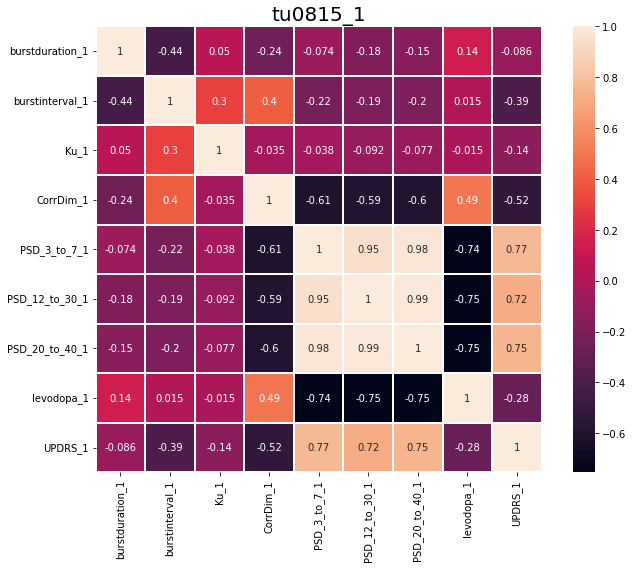

<Figure size 432x288 with 0 Axes>

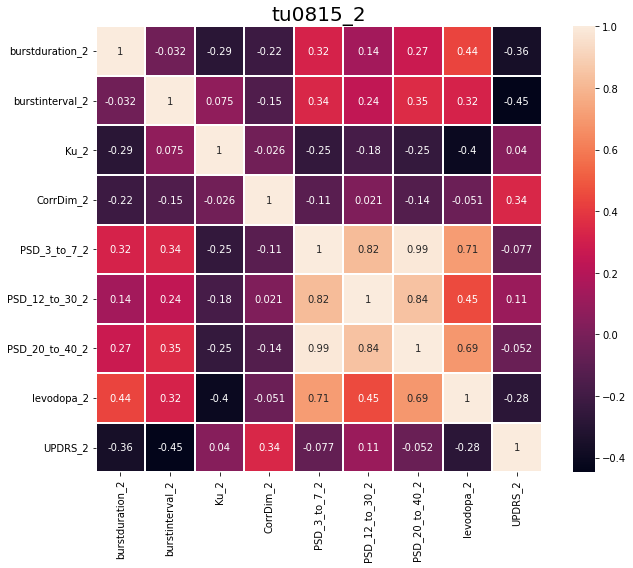

<Figure size 432x288 with 0 Axes>

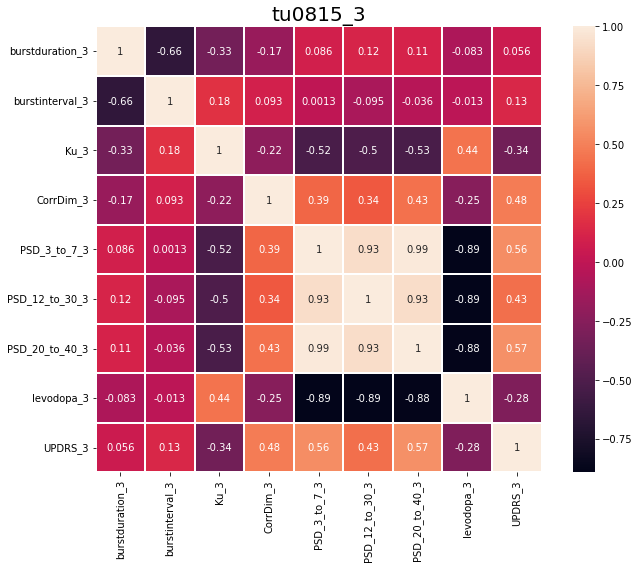

<Figure size 432x288 with 0 Axes>

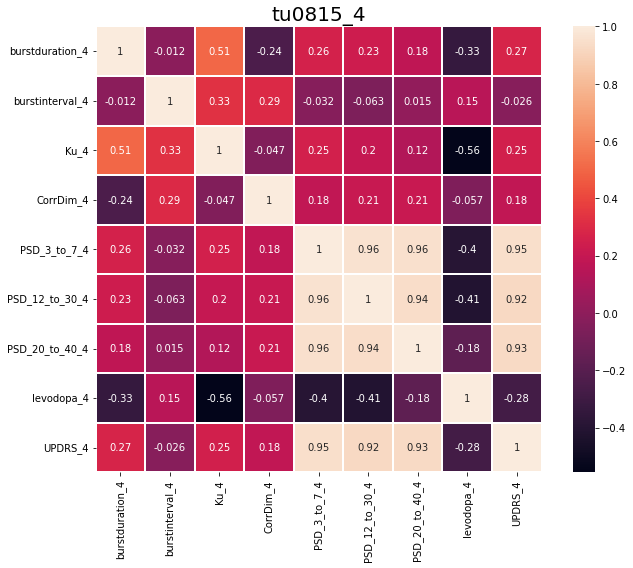

<Figure size 432x288 with 0 Axes>

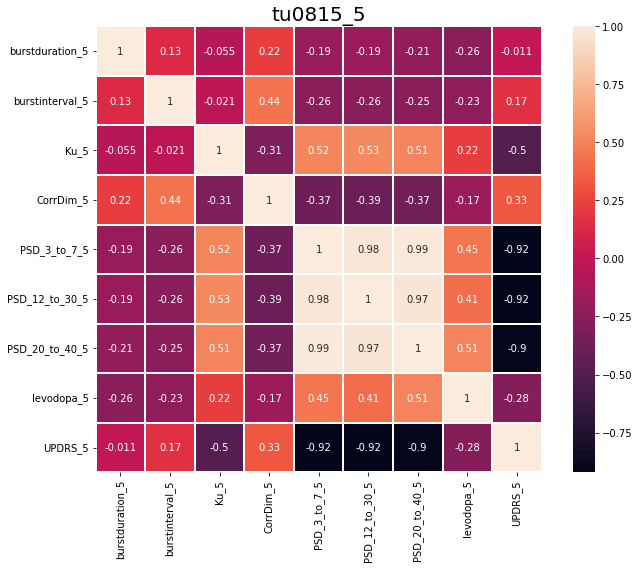

<Figure size 432x288 with 0 Axes>

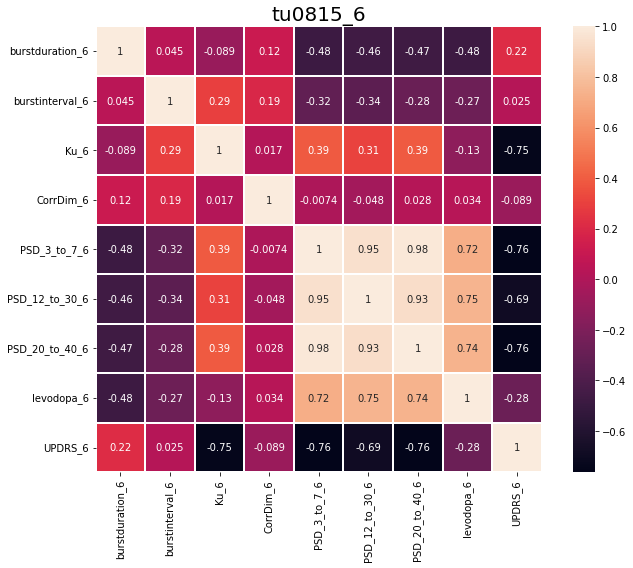

<Figure size 432x288 with 0 Axes>

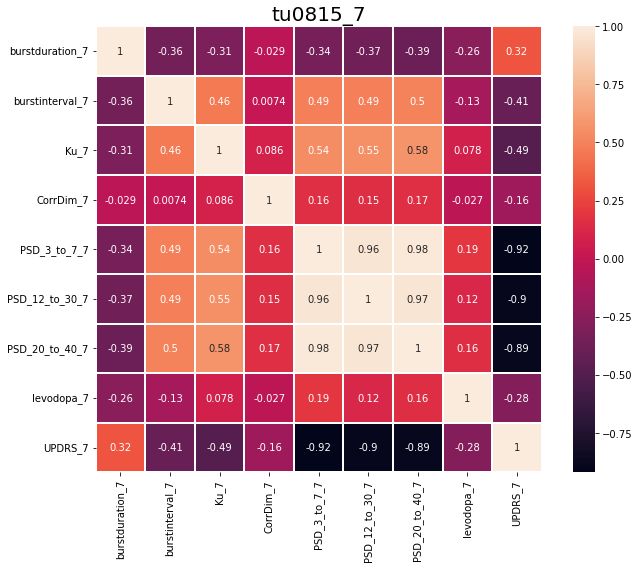

<Figure size 432x288 with 0 Axes>

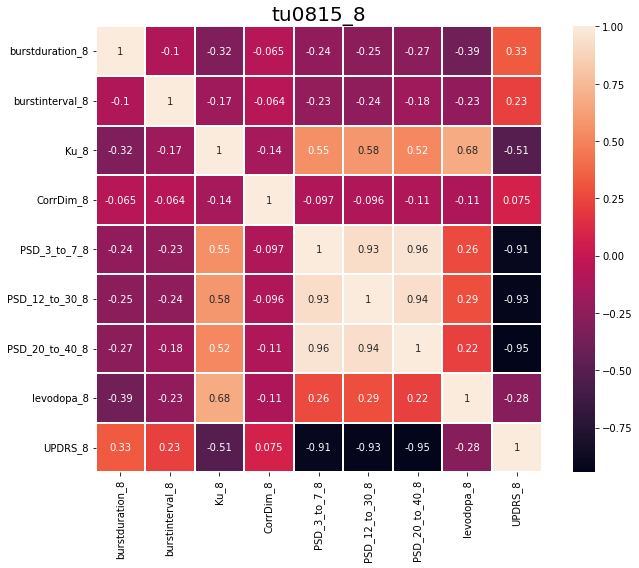

<Figure size 432x288 with 0 Axes>

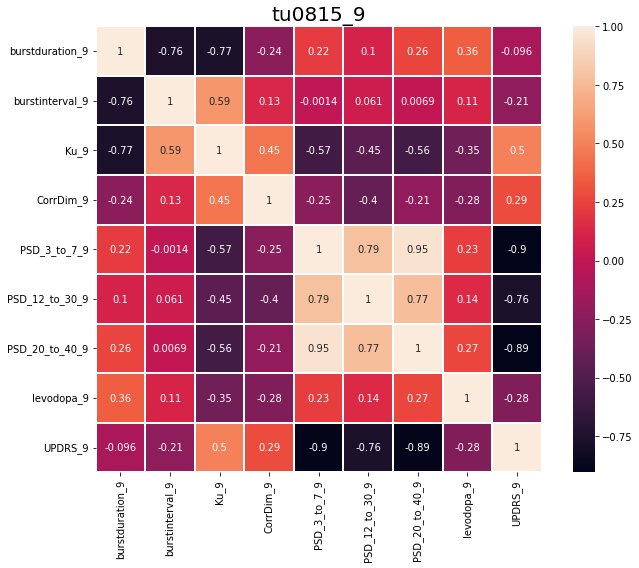

<Figure size 432x288 with 0 Axes>

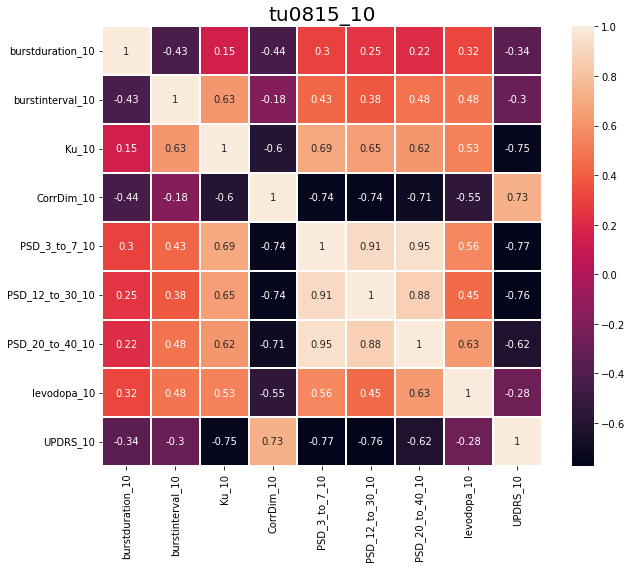

<Figure size 432x288 with 0 Axes>

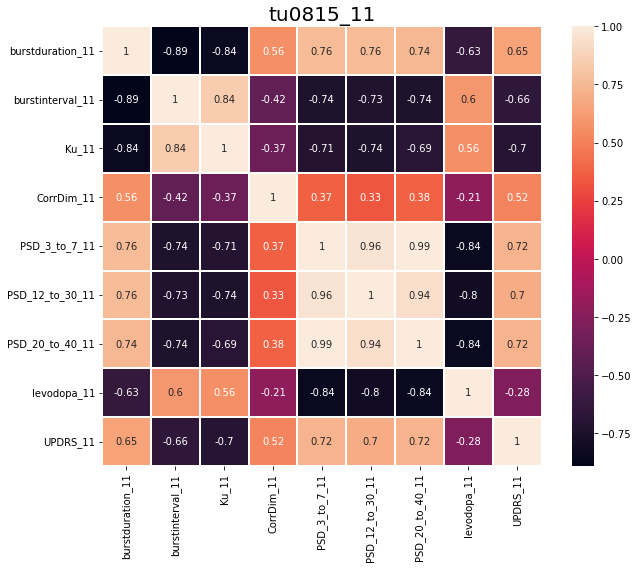

<Figure size 432x288 with 0 Axes>

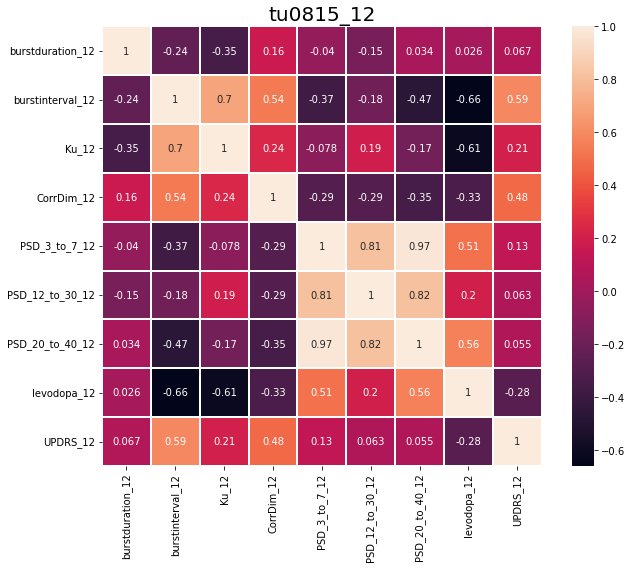

<Figure size 432x288 with 0 Axes>

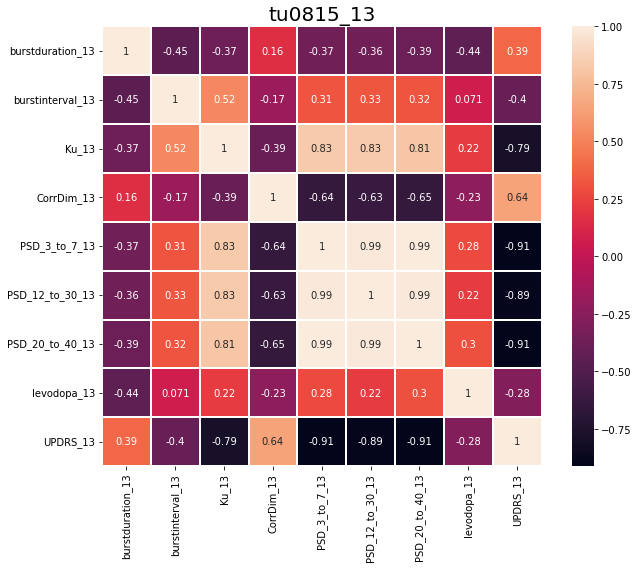

<Figure size 432x288 with 0 Axes>

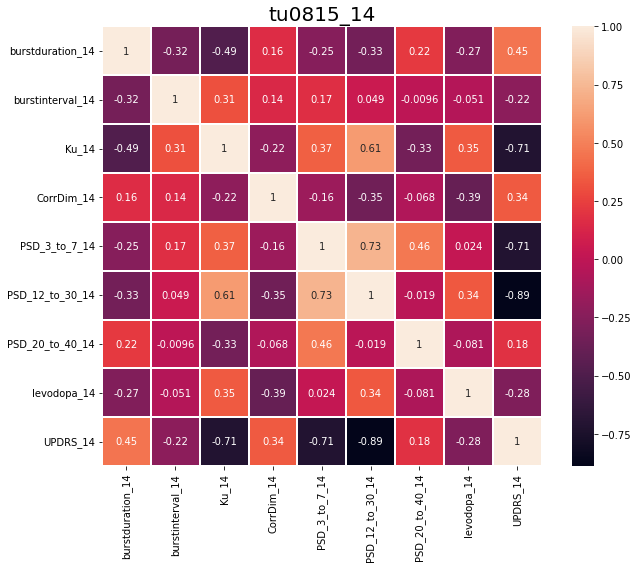

<Figure size 432x288 with 0 Axes>

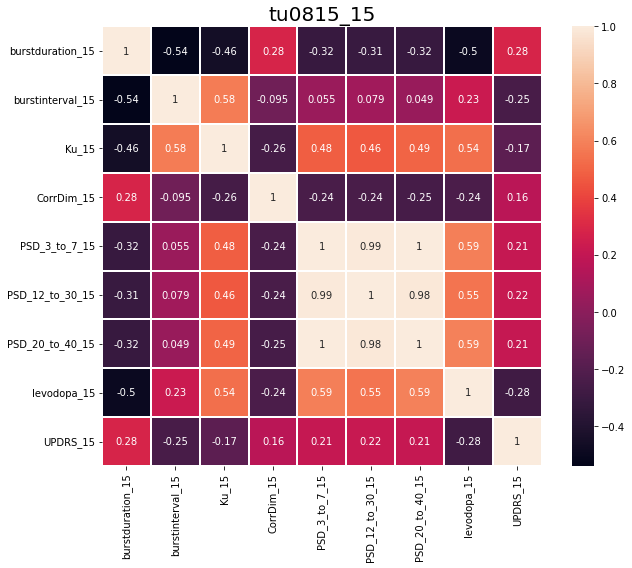

<Figure size 432x288 with 0 Axes>

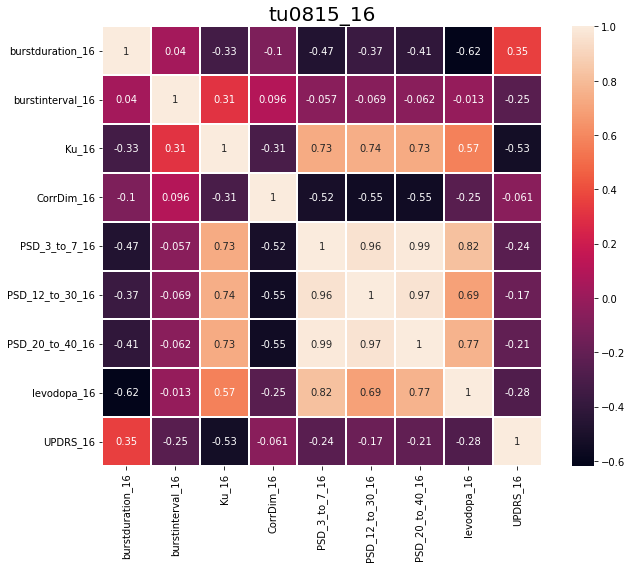

<Figure size 432x288 with 0 Axes>

In [21]:
D=[]

for filename in listdir(mypath): 
    fullpath = join(mypath,filename)
    D.append(getcorData(fullpath))
for i in range(16):
    Data= pd.DataFrame()
    for j in range(len(D)):
        Data=pd.concat([Data, D[j][i]], axis=0)
    corr_matrix = Data.corr()
    corr_matrix.to_csv(folder+'_'+str(i+1)+'.csv')
    plt.figure(figsize = (10,8))
    swarm_plot=sns.heatmap(corr_matrix,linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)
    fig = swarm_plot.get_figure()
    plt.title(patient+'_'+str(i+1), fontsize =20)
    fig.tight_layout()
    fig.savefig(folder+'_'+str(i+1)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
    plt.figure().clear()
    
    

# PCA

In [22]:
df= pd.DataFrame()

for filename in listdir(mypath):
    fullpath = join(mypath,filename)
    data=getData(fullpath)
    df=pd.concat([df, data], axis=0)

In [23]:
df

burstduration_1  burstinterval_1  kurtosis_1  CorrDim_1  \
test                                                                        
tu0815_Test02-10         0.372083         0.398115    5.072780   1.790345   
tu0815_Test02-1          0.724571         0.504313    4.768813   1.757885   
tu0815_Test02-2          0.694347         0.361736    6.071008   1.783300   
tu0815_Test02-3          0.774643         0.458750   13.743727   1.764856   
tu0815_Test02-4          0.392227         0.408292    6.249990   1.775457   
tu0815_Test02-5          0.618698         0.342571    4.883306   1.811643   
tu0815_Test02-6          0.403065         0.413999    6.135696   1.797143   
tu0815_Test02-7          0.463843         0.511006    6.718039   1.782534   
tu0815_Test02-8          0.669946         0.348574    4.991842   1.823215   
tu0815_Test02-9          0.338050         0.488273    5.889744   1.808927   
tu0815_Test46-10         0.587238         0.394397    4.813752   1.840984   
tu0815_Test46-1          0.468750         0.419000    5.122499   1.861389   
tu0815_Test46-2          0.512056         0.402000    5.861824   1.903463   
tu0815_Test46-3          0.449725         0.350812    4.963073   1.938178   
tu0815_Test46-4          0.499833         0.427550    4.608207   1.892895   
tu0815_Test46-5          0.612000         0.309400    6.197931   1.791538   
tu0815_Test46-6          0.519447         0.448113    5.179556   1.836170   
tu0815_Test46-7          0.903452         0.415279    5.765630   1.839708   
tu0815_Test46-8          0.564425         0.528764    4.800485   1.878173   
tu0815_Test46-9          0.396798         0.483924    9.144933   1.843798   
tu0815_Test69-10         0.788500         0.341688    4.966769   1.904297   
tu0815_Test69-1          0.414438         0.677667    7.221493   1.847709   
tu0815_Test69-2          0.689773         0.399137    8.325945   1.888880   
tu0815_Test69-3          0.505378         0.584626    6.926223   1.898910   
tu0815_Test69-4          0.539937         0.535167    7.379592   1.889776   
tu0815_Test69-5          0.501556         0.446350    7.020252   1.850117   
tu0815_Test69-6          0.437052         0.542021    9.694577   1.857800   
tu0815_Test69-7          0.926750         0.389214    6.065688   1.856395   
tu0815_Test69-8          1.103600         0.415250    9.927880   1.835411   
tu0815_Test69-9          0.701143         0.417937    5.840395   1.833835   
tu0815_Test92-10         0.462787         0.498599    7.971791   1.870002   
tu0815_Test92-1          0.936397         0.399262    4.282057   1.824384   
tu0815_Test92-2          0.431494         0.535118    9.764254   1.885792   
tu0815_Test92-3          0.503814         0.534045    7.333662   1.876892   
tu0815_Test92-4          0.462833         0.472500    6.262838   1.915272   
tu0815_Test92-5          0.503688         0.566444    6.081458   1.891002   
tu0815_Test92-6          0.546961         0.570897    5.957026   1.898595   
tu0815_Test92-7          0.759797         0.296791    5.073357   1.715611   
tu0815_Test92-8          0.473549         0.578067    7.105988   1.949908   
tu0815_Test92-9          0.380524         0.573337    4.971215   1.926673   

                  PSD_3_to_7_1  PSD_12_to_30_1  PSD_20_to_40_1  \
test                                                             
tu0815_Test02-10      0.000207        0.000237        0.000354   
tu0815_Test02-1       0.000156        0.000294        0.000349   
tu0815_Test02-2       0.000148        0.000260        0.000326   
tu0815_Test02-3       0.000124        0.000251        0.000274   
tu0815_Test02-4       0.000162        0.000247        0.000297   
tu0815_Test02-5       0.000191        0.000301        0.000364   
tu0815_Test02-6       0.000235        0.000249        0.000392   
tu0815_Test02-7       0.000274        0.000292        0.000467   
tu0815_Test02-8       0.000213        0.000324        0.000392   
tu0815_Test02-9       0.000241        0.000312        0.0

In [24]:
# 使用 scikit-learn 內建的 API 正規化
scaler = StandardScaler()
Z= scaler.fit_transform(df)  # 注意維度

In [25]:
df.iloc[:, :] = Z

# 印出正規化後的資料

In [26]:
df.head()

burstduration_1  burstinterval_1  kurtosis_1  CorrDim_1  \
test                                                                        
tu0815_Test02-10        -1.155328        -0.657348   -0.750963  -1.098688   
tu0815_Test02-1          0.842943         0.575816   -0.913304  -1.712241   
tu0815_Test02-2          0.671601        -1.079782   -0.217835  -1.231860   
tu0815_Test02-3          1.126801         0.046743    3.879966  -1.580479   
tu0815_Test02-4         -1.041131        -0.539181   -0.122245  -1.380099   

                  PSD_3_to_7_1  PSD_12_to_30_1  PSD_20_to_40_1  \
test                                                             
tu0815_Test02-10      1.804646        1.170495        1.566416   
tu0815_Test02-1       1.092792        1.897006        1.529713   
tu0815_Test02-2       0.977127        1.469003        1.325921   
tu0815_Test02-3       0.634924        1.351343        0.882021   
tu0815_Test02-4       1.167785        1.299416        1.076335   

                  burstduration_2  burstinterval_2  kurtosis_2  ...  \
test                                                            ...   
tu0815_Test02-10        -1.185021        -0.630456    2.629630  ...   
tu0815_Test02-1         -0.244711        -1.572171   -0.678349  ...   
tu0815_Test02-2         -1.180479        -1.193057   -0.687667  ...   
tu0815_Test02-3         -0.055812        -1.788794   -0.099879  ...   
tu0815_Test02-4         -0.269039        -0.686454    0.731041  ...   

                  PSD_3_to_7_15  PSD_12_to_30_15  PSD_20_to_40_15  \
test                                                                
tu0815_Test02-10      -0.624666        -0.675074        -0.687667   
tu0815_Test02-1       -0.623442        -0.684179        -0.687965   
tu0815_Test02-2       -0.621896        -0.670052        -0.681027   
tu0815_Test02-3       -0.608046        -0.670754        -0.684799   
tu0815_Test02-4       -0.623850        -0.689877        -0.700859   

                  burstduration_16  burstinterval_16  kurtosis_16  CorrDim_16  \
test                                                                            
tu0815_Test02-10          0.919869          0.124738    -1.101106    1.246925   
tu0815_Test02-1           2.198839         -1.224612    -0.884032   -0.515737   
tu0815_Test02-2          -0.431187          0.346112    -0.986965   -0.204154   
tu0815_Test02-3           0.231166          0.200214    -0.832100    0.363351   
tu0815_Test02-4          -0.612623         -0.728880    -1.083355    1.453939   

                  PSD_3_to_7_16  PSD_12_to_30_16  PSD_20_to_40_16  
test                                                               
tu0815_Test02-10      -0.814846        -1.058295        -0.938550  
tu0815_Test02-1       -0.811690        -1.067938        -0.934455  
tu0815_Test02-2       -0.808262        -1.042440        -0.925812  
tu0815_Test02-3       -0.805777        -1.051383        -0.941193  
tu0815_Test02-4       -0.811768        -1.068238        -0.938358  

[5 rows x 112 columns]

In [27]:
df_stats = df.describe().loc[['mean', 'std']]
df_stats.style.format("{:.2f}")

In [28]:
df.index

Index(['tu0815_Test02-10', 'tu0815_Test02-1', 'tu0815_Test02-2',
       'tu0815_Test02-3', 'tu0815_Test02-4', 'tu0815_Test02-5',
       'tu0815_Test02-6', 'tu0815_Test02-7', 'tu0815_Test02-8',
       'tu0815_Test02-9', 'tu0815_Test46-10', 'tu0815_Test46-1',
       'tu0815_Test46-2', 'tu0815_Test46-3', 'tu0815_Test46-4',
       'tu0815_Test46-5', 'tu0815_Test46-6', 'tu0815_Test46-7',
       'tu0815_Test46-8', 'tu0815_Test46-9', 'tu0815_Test69-10',
       'tu0815_Test69-1', 'tu0815_Test69-2', 'tu0815_Test69-3',
       'tu0815_Test69-4', 'tu0815_Test69-5', 'tu0815_Test69-6',
       'tu0815_Test69-7', 'tu0815_Test69-8', 'tu0815_Test69-9',
       'tu0815_Test92-10', 'tu0815_Test92-1', 'tu0815_Test92-2',
       'tu0815_Test92-3', 'tu0815_Test92-4', 'tu0815_Test92-5',
       'tu0815_Test92-6', 'tu0815_Test92-7', 'tu0815_Test92-8',
       'tu0815_Test92-9'],
      dtype='object', name='test')

# 取得按照時間順序排列的資料

In [29]:
lo=[]
for j in range(len(test)):
    lo.append([])
for i in range(len(df.index)):    
    for j in range(len(test)):
            if((testname+test[j]) in df.index[i]):
                    lo[j].append(i)


In [30]:
lo

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]]

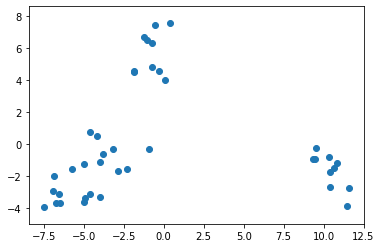

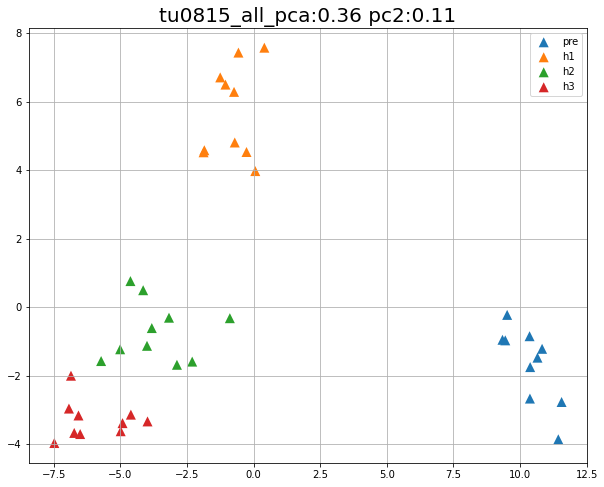

<Figure size 432x288 with 0 Axes>

In [31]:
"""
透過 scikit-learn 將數據降到 2 維
"""
# 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
# 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
n_components = 2
random_state = 9527

pca = PCA(n_components=n_components, 
          random_state=random_state)

# 注意我們是對正規化後的特徵 Z 做 PCA
L = pca.fit_transform(Z)  # (n_samples, n_components)

# 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸
plt.scatter(L[:, 0], L[:, 1])
plt.axis('equal');
# 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸，依照不同時間段資料點顏色不同
fig, ax = plt.subplots(figsize=(10,8))

for i in range(len(lo)):
    ax.scatter(L[lo[i],0], L[lo[i],1], label=label[i],marker ="^",
                edgecolors='none',s=100)

eig=np.round(pca.explained_variance_ratio_, 2)

plt.title(patient+'_all_pca:'+str(eig[0])+' pc2:'+str(eig[1]), fontsize =20)

ax.legend()
ax.grid(True)

plt.show()
fig.savefig(folder+'_all_pca'+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
plt.figure().clear()

In [32]:
"""
解析數據的前兩大主成份所代表的意涵。
顏色越突出代表其絕對值越大
"""
pcs = np.array(pca.components_) # (n_comp, n_features)

df_pc = pd.DataFrame(pcs, columns=df.columns[:])
df_pc.index = [f"第{c}主成分" for c in['一', '二']]
df_pc.style\
    .background_gradient(cmap='bwr_r', axis=None)\
    .format("{:.2}")
df_pc.to_csv(folder+'_pc_all'+'.csv', index=False)

# 每一頻道全部指標的PCA

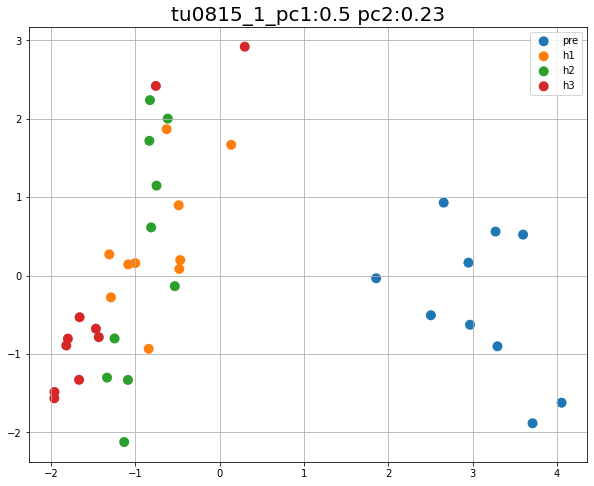

<Figure size 432x288 with 0 Axes>

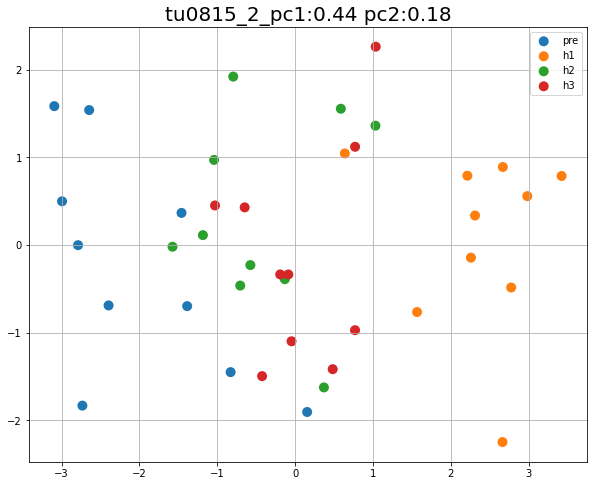

<Figure size 432x288 with 0 Axes>

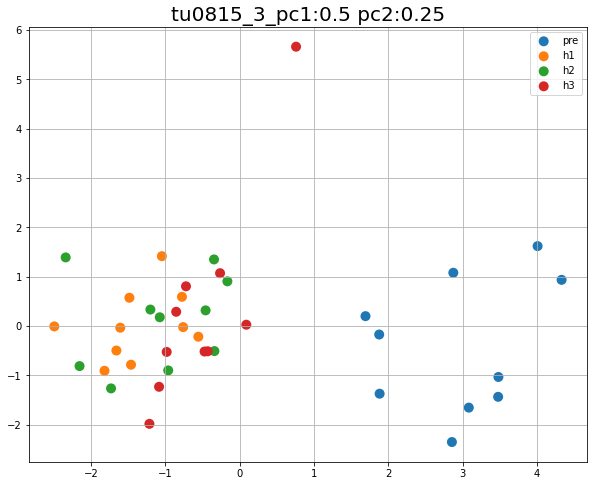

<Figure size 432x288 with 0 Axes>

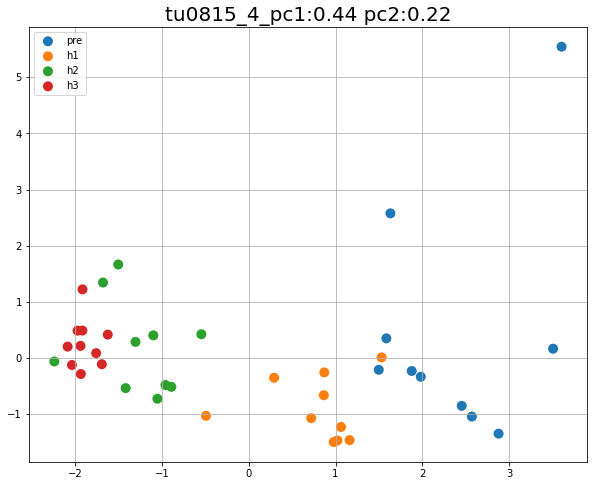

<Figure size 432x288 with 0 Axes>

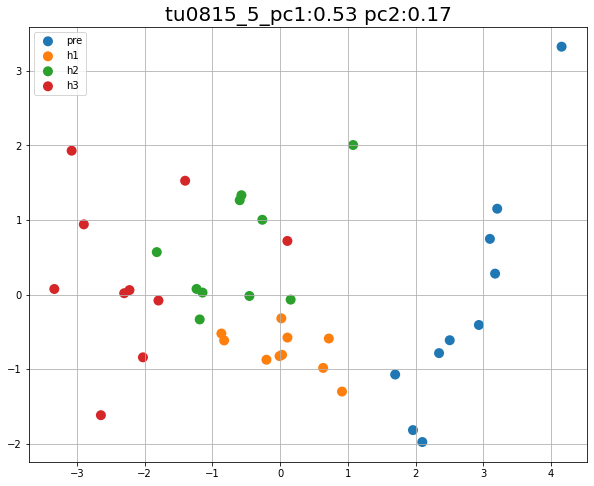

<Figure size 432x288 with 0 Axes>

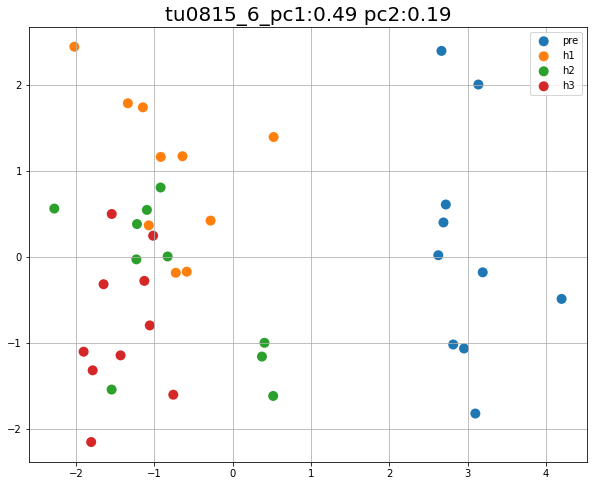

<Figure size 432x288 with 0 Axes>

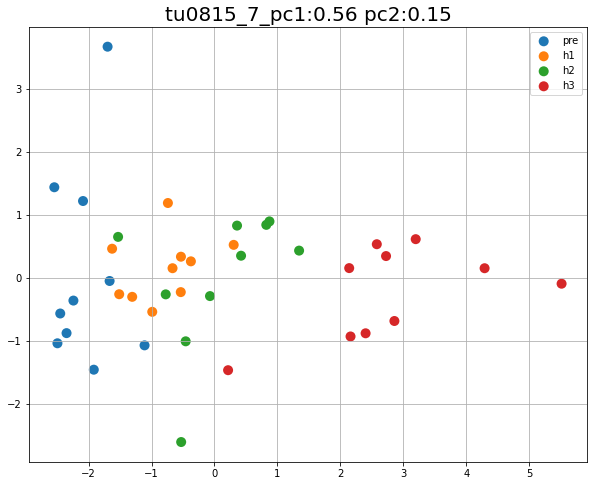

<Figure size 432x288 with 0 Axes>

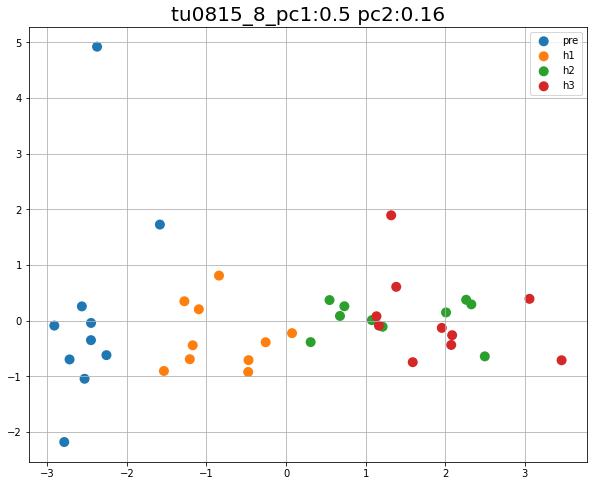

<Figure size 432x288 with 0 Axes>

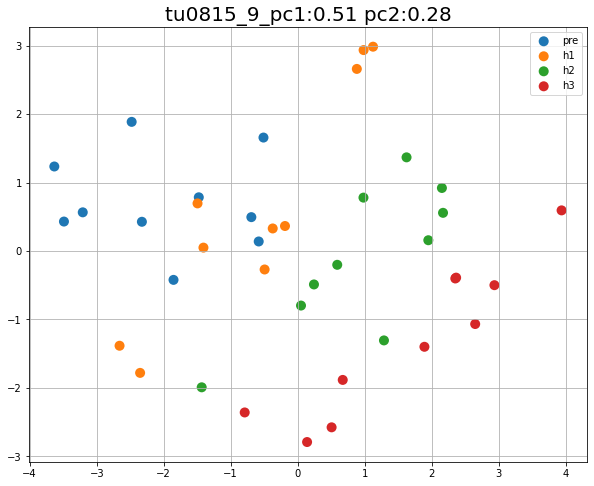

<Figure size 432x288 with 0 Axes>

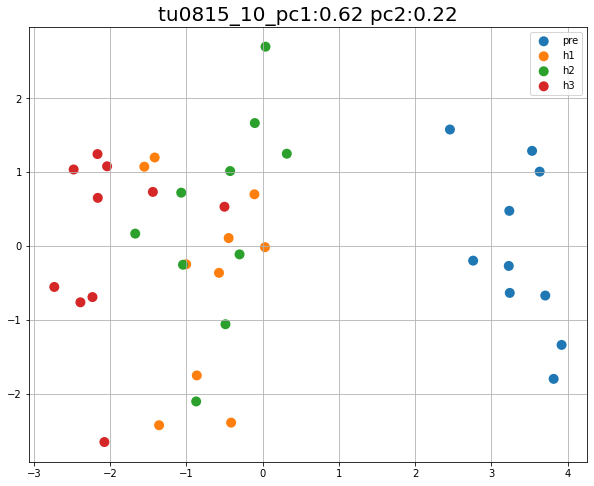

<Figure size 432x288 with 0 Axes>

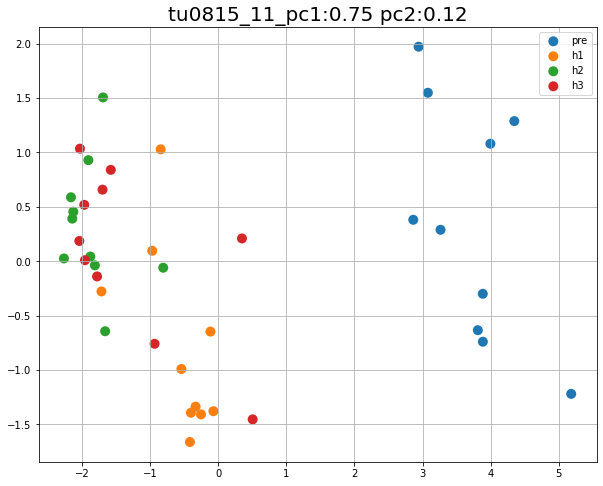

<Figure size 432x288 with 0 Axes>

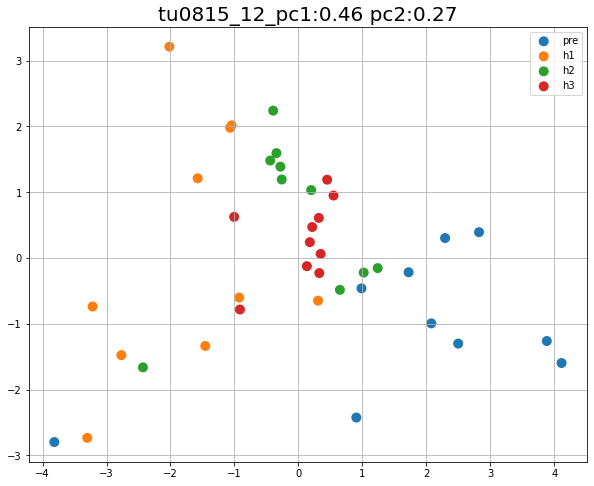

<Figure size 432x288 with 0 Axes>

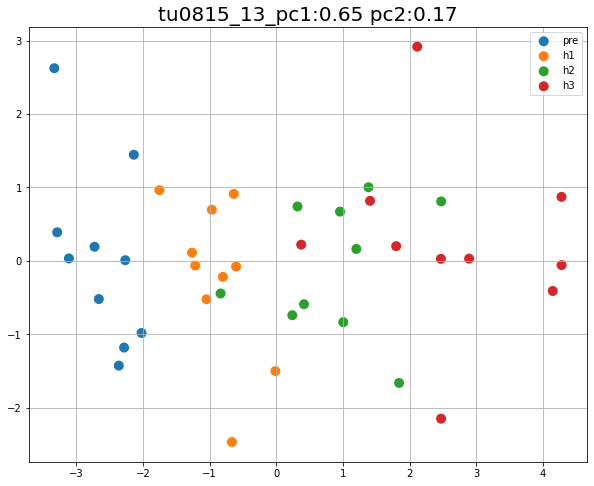

<Figure size 432x288 with 0 Axes>

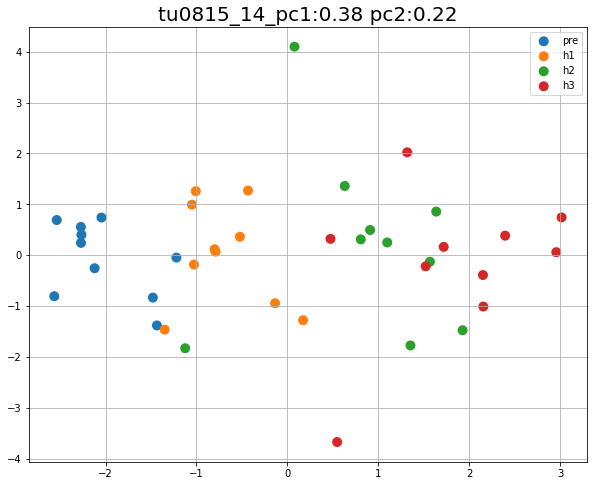

<Figure size 432x288 with 0 Axes>

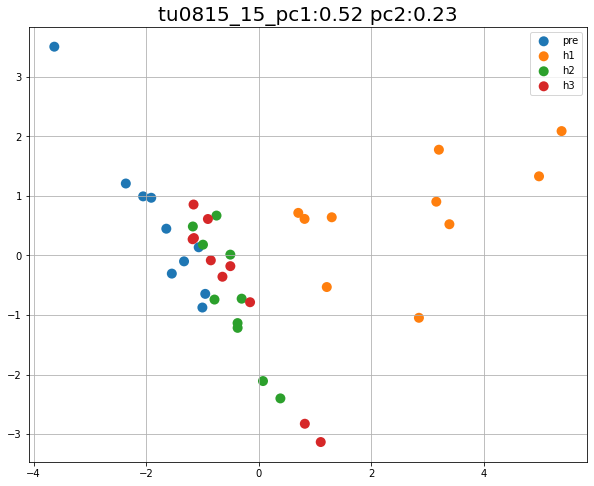

<Figure size 432x288 with 0 Axes>

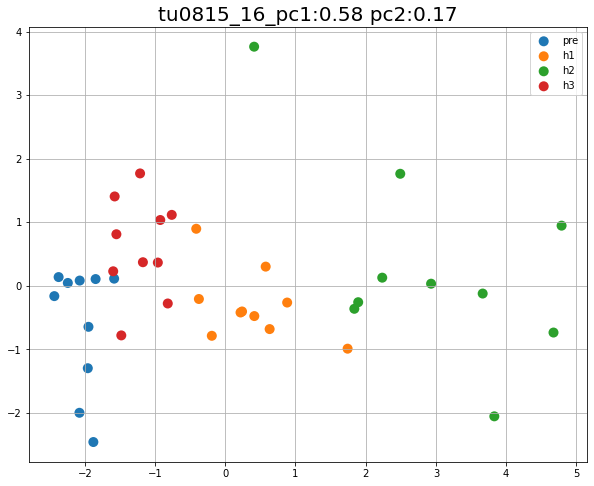

<Figure size 432x288 with 0 Axes>

In [33]:
import seaborn as sns
D=[]
for filename in listdir(mypath): 
    fullpath = join(mypath,filename)
    D.append(getsepData(fullpath))
for i in range(16):
    Data= pd.DataFrame()    
    for j in range(len(D)):
        Data=pd.concat([Data, D[j][i]], axis=0)   
    # 使用 scikit-learn 內建的 API 正規化
    scaler = StandardScaler()
    Z= scaler.fit_transform(Data)  # 注意維度
    
    # 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
    # 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
    n_components = 2
    random_state = 9527
    pca = PCA(n_components=n_components, 
              random_state=random_state)
    # 注意我們是對正規化後的特徵 Z 做 PCA
    L = pca.fit_transform(Z)  # (n_samples, n_components)

    # 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸
    fig, ax = plt.subplots(figsize=(10,8))
    for j in range(len(lo)):
        ax.scatter(L[lo[j],0], L[lo[j],1], label=label[j],
                    edgecolors='none',s=100)

    s=np.round(pca.explained_variance_ratio_, 2)
    plt.title(patient+'_'+str(i+1)+'_pc1:'+str(s[0])+' pc2:'+str(s[1]), fontsize =20)
    
    ax.legend()
    ax.grid(True)
    plt.show()
    pcs = np.array(pca.components_) # (n_comp, n_features)
    df_pc = pd.DataFrame(pcs, columns=Data.columns[:])
    df_pc.index = [f"{i+1}cha_{c}_component" for c in['one', 'second']]
    df_pc.style\
        #.background_gradient(cmap='bwr_r', axis=None)\
        #.format("{:.2}")
    df_pc.to_csv(folder+'_df'+str(i+1)+'.csv')
    
    fig.savefig(folder+'_pca'+str(i+1)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
    plt.figure().clear()

# pca_頻域指標

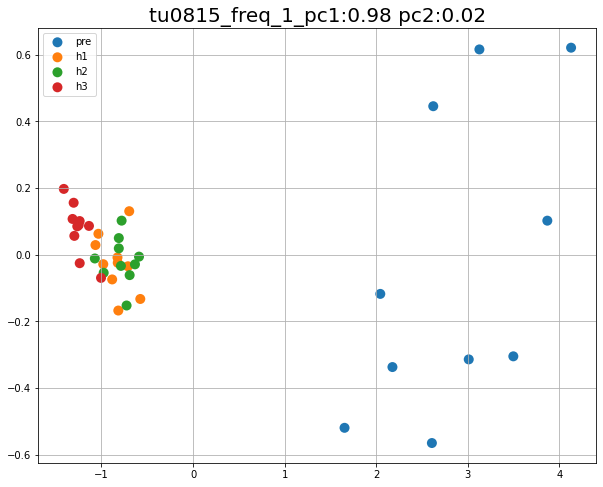

<Figure size 432x288 with 0 Axes>

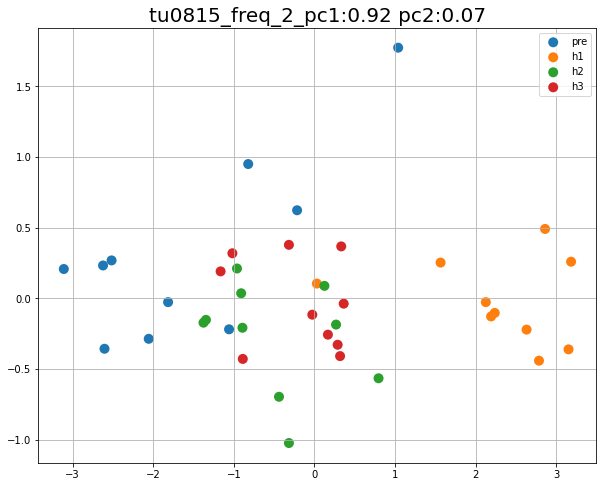

<Figure size 432x288 with 0 Axes>

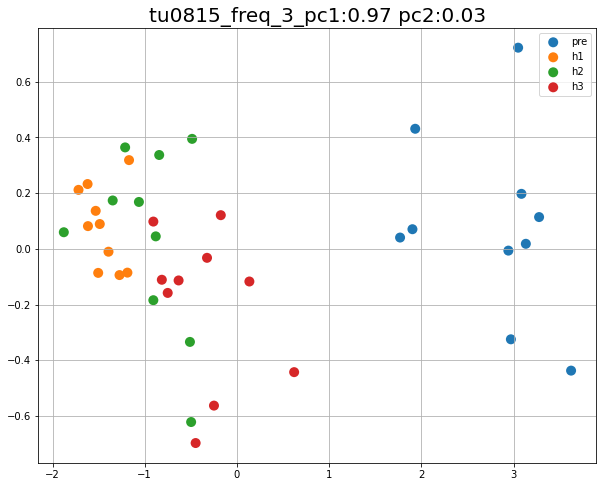

<Figure size 432x288 with 0 Axes>

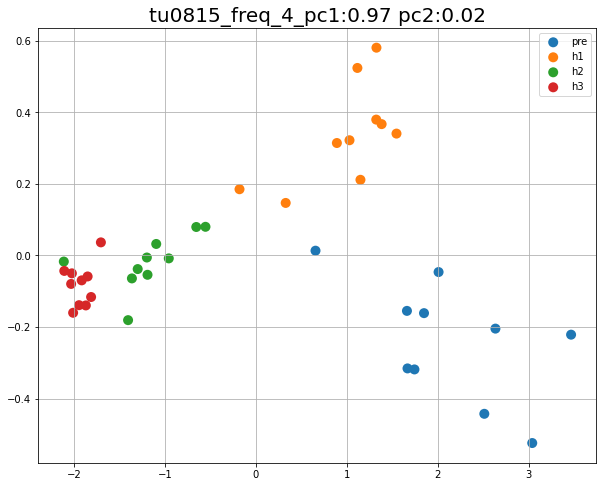

<Figure size 432x288 with 0 Axes>

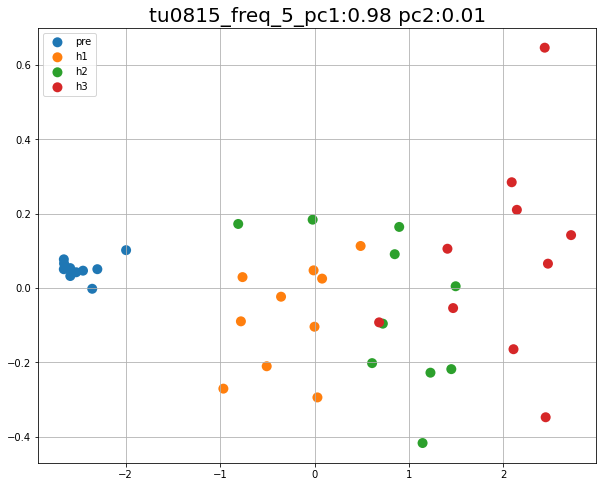

<Figure size 432x288 with 0 Axes>

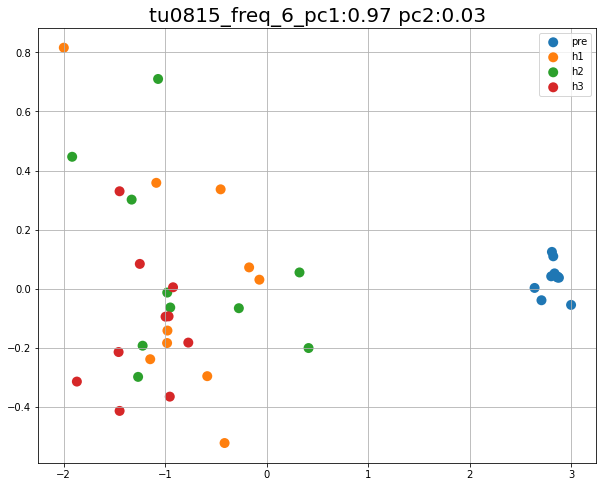

<Figure size 432x288 with 0 Axes>

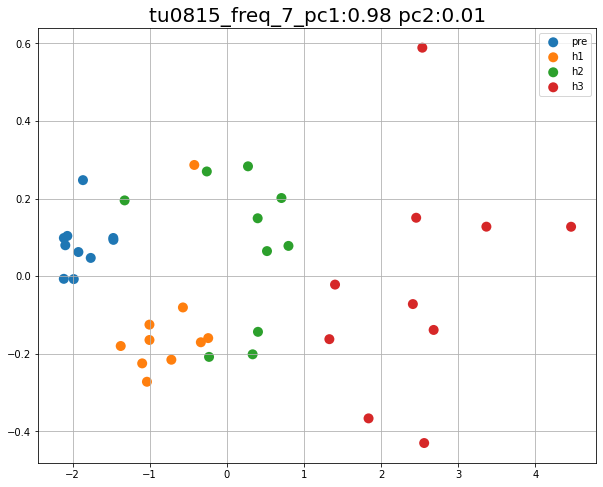

<Figure size 432x288 with 0 Axes>

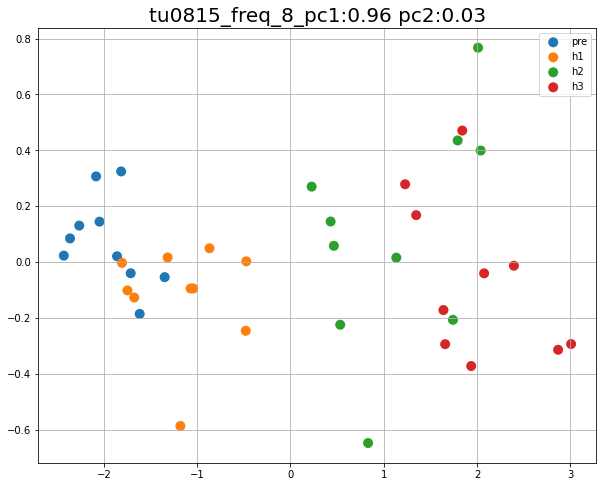

<Figure size 432x288 with 0 Axes>

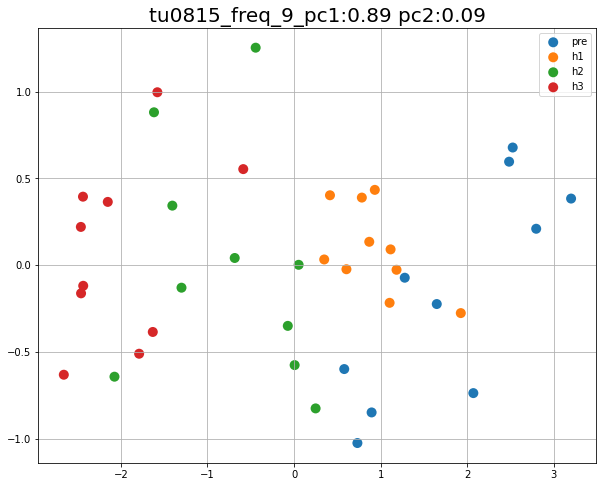

<Figure size 432x288 with 0 Axes>

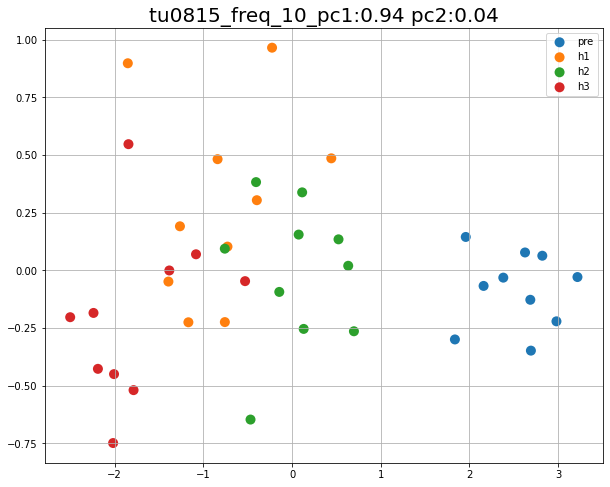

<Figure size 432x288 with 0 Axes>

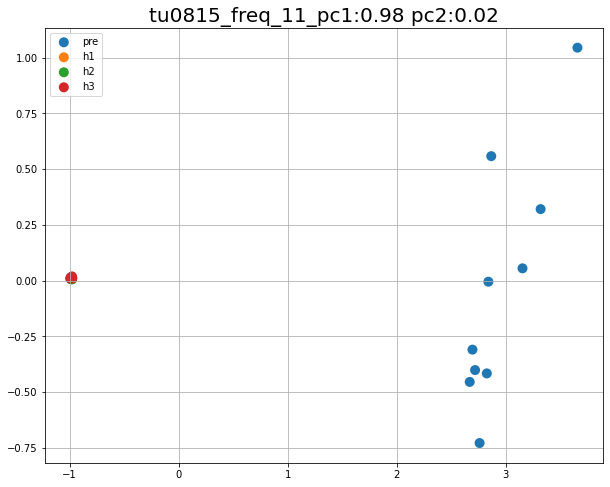

<Figure size 432x288 with 0 Axes>

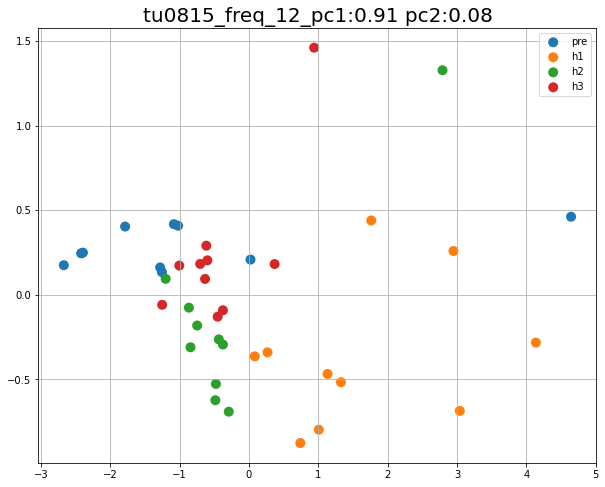

<Figure size 432x288 with 0 Axes>

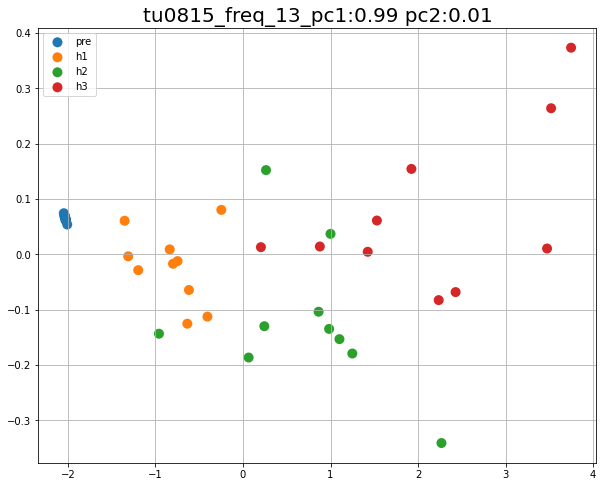

<Figure size 432x288 with 0 Axes>

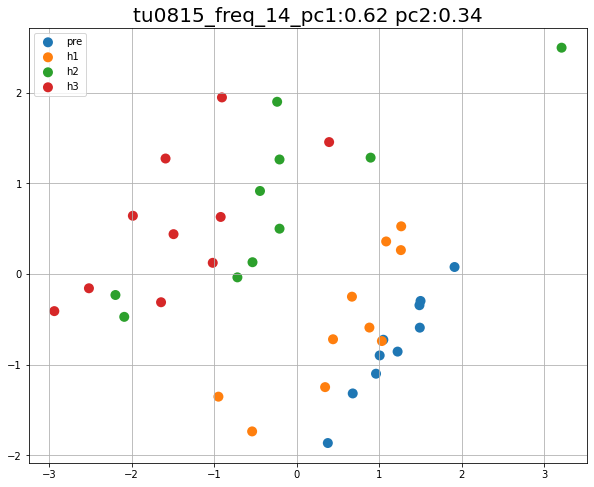

<Figure size 432x288 with 0 Axes>

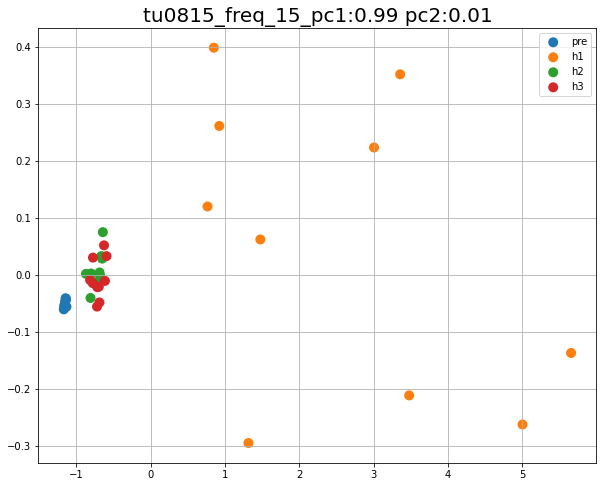

<Figure size 432x288 with 0 Axes>

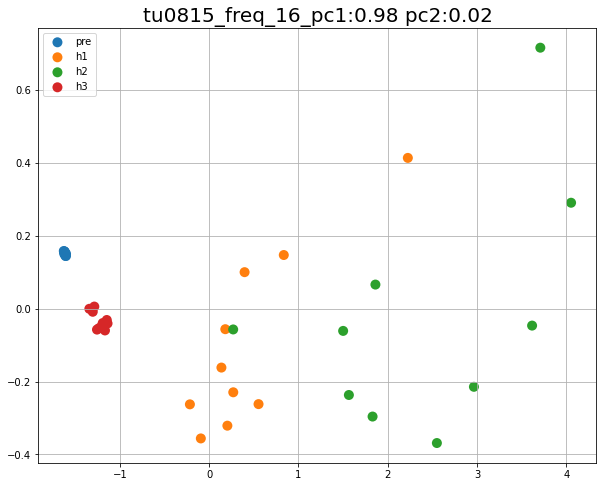

<Figure size 432x288 with 0 Axes>

In [34]:
import seaborn as sns

D=[]
for filename in listdir(mypath): 
    fullpath = join(mypath,filename)
    D.append(getsepDatafreq(fullpath))
for i in range(16):
    Data= pd.DataFrame()    
    for j in range(len(D)):
        Data=pd.concat([Data, D[j][i]], axis=0)   
    # 使用 scikit-learn 內建的 API 正規化
    scaler = StandardScaler()
    Z= scaler.fit_transform(Data)  # 注意維度
    
    # 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
    # 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
    n_components = 2
    random_state = 9527
    pca = PCA(n_components=n_components, 
              random_state=random_state)
    # 注意我們是對正規化後的特徵 Z 做 PCA
    L = pca.fit_transform(Z)  # (n_samples, n_components)

    # 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸

    fig, ax = plt.subplots(figsize=(10,8))
    for j in range(len(lo)):
        ax.scatter(L[lo[j],0], L[lo[j],1], label=label[j],
                    edgecolors='none',s=100)
    s=np.round(pca.explained_variance_ratio_, 2)

    plt.title(patient+'_freq_'+str(i+1)+'_pc1:'+str(s[0])+' pc2:'+str(s[1]), fontsize =20)
    
    ax.legend()
    ax.grid(True)
    plt.show()
    pcs = np.array(pca.components_) # (n_comp, n_features)

    df_pc = pd.DataFrame(pcs, columns=Data.columns[:])
    df_pc.index = [f"{i+1}cha_{c}_component" for c in['one', 'second']]
    df_pc.style\
        .background_gradient(cmap='bwr_r', axis=None)\
        .format("{:.2}")
    df_pc.to_csv(folder+'_freq_df'+str(i+1)+'.csv')
    fig.savefig(folder+'_freq_pca'+str(i+1)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
    plt.figure().clear()

# pca 時域指標

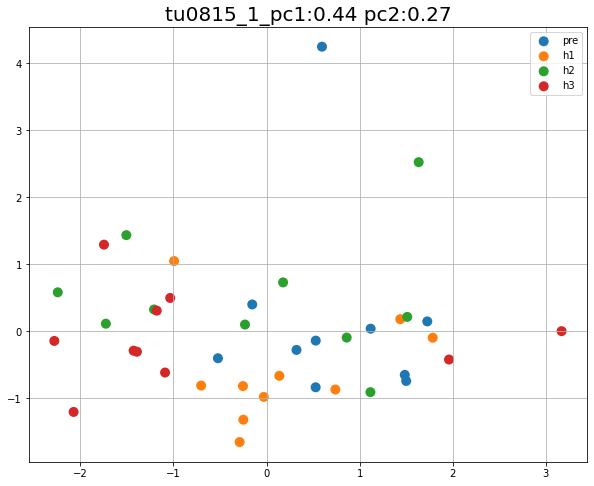

<Figure size 432x288 with 0 Axes>

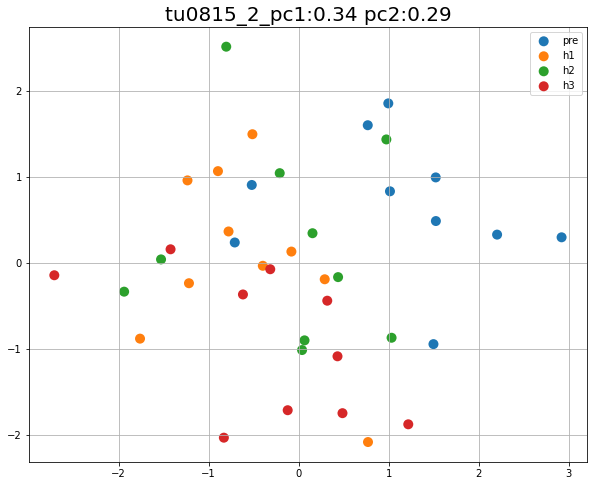

<Figure size 432x288 with 0 Axes>

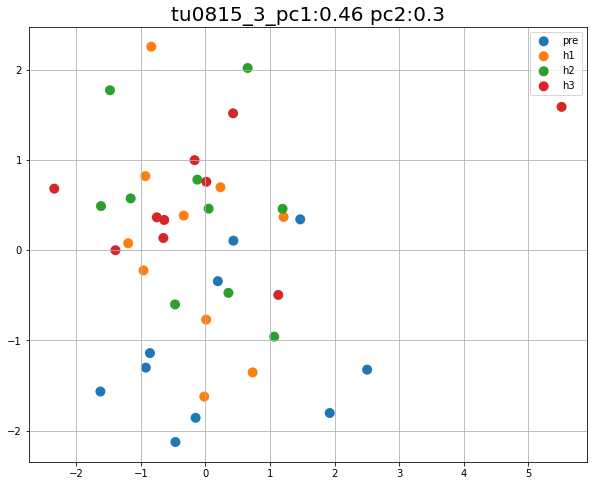

<Figure size 432x288 with 0 Axes>

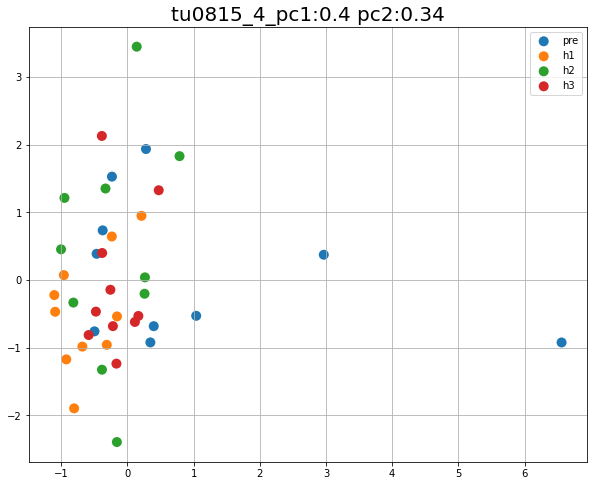

<Figure size 432x288 with 0 Axes>

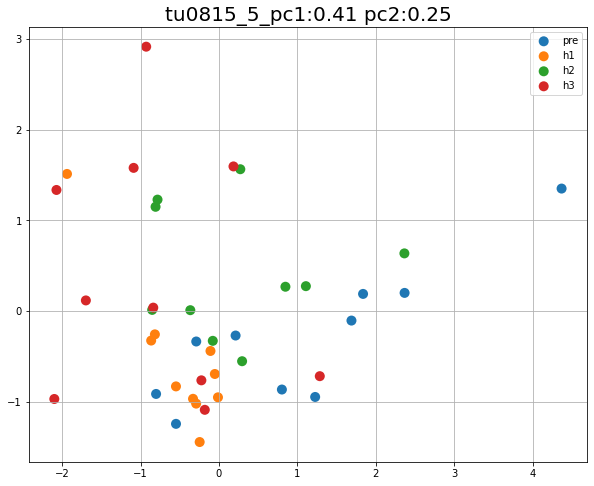

<Figure size 432x288 with 0 Axes>

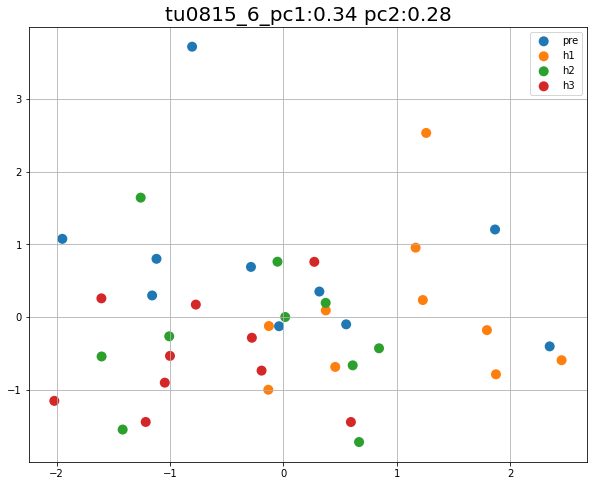

<Figure size 432x288 with 0 Axes>

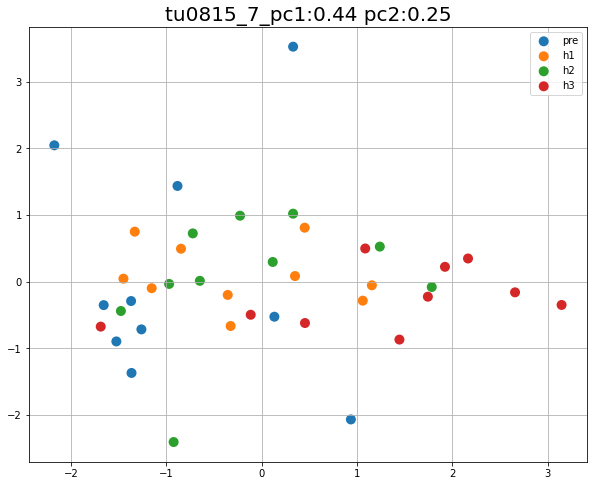

<Figure size 432x288 with 0 Axes>

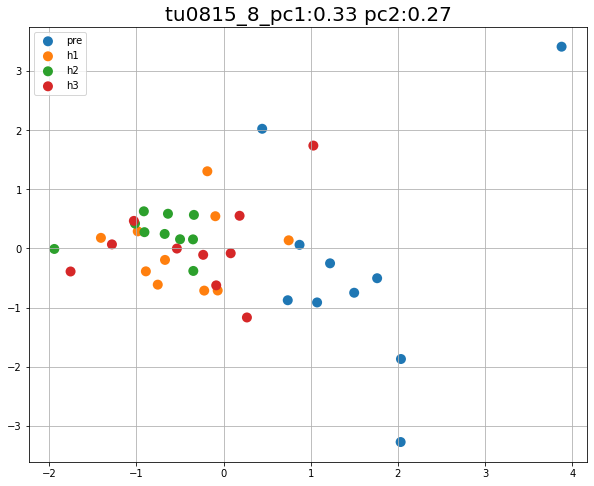

<Figure size 432x288 with 0 Axes>

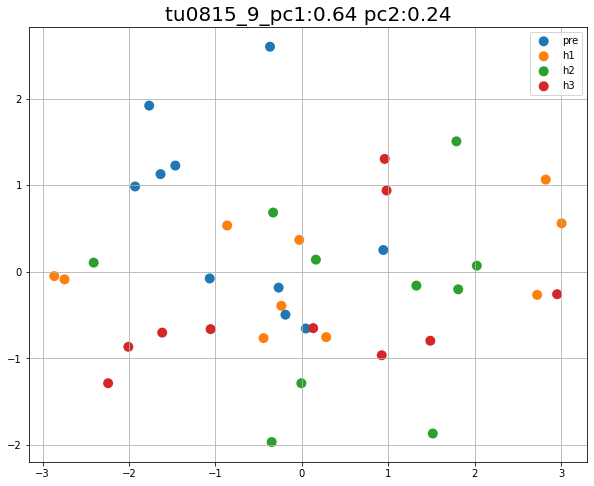

<Figure size 432x288 with 0 Axes>

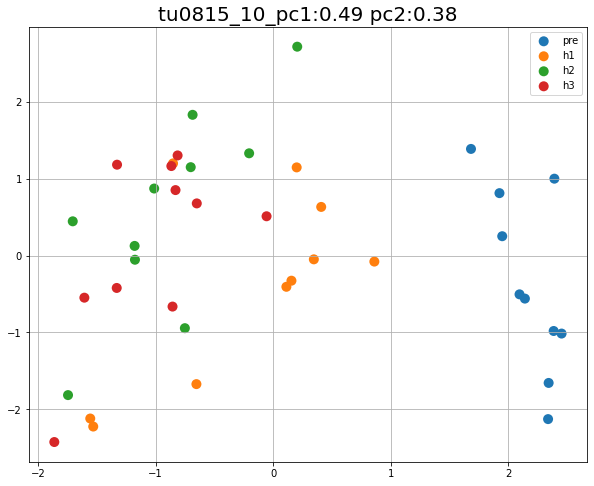

<Figure size 432x288 with 0 Axes>

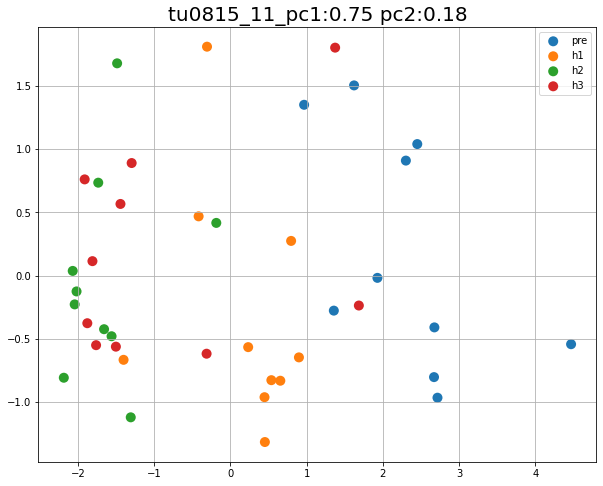

<Figure size 432x288 with 0 Axes>

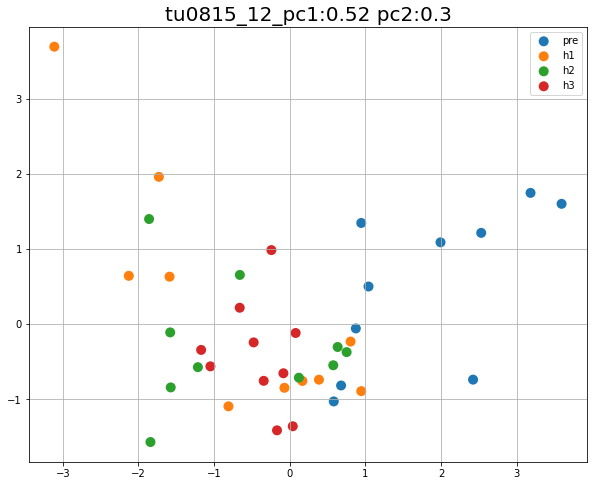

<Figure size 432x288 with 0 Axes>

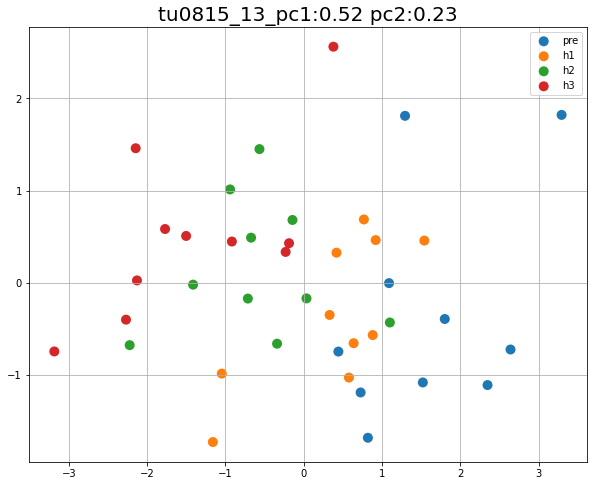

<Figure size 432x288 with 0 Axes>

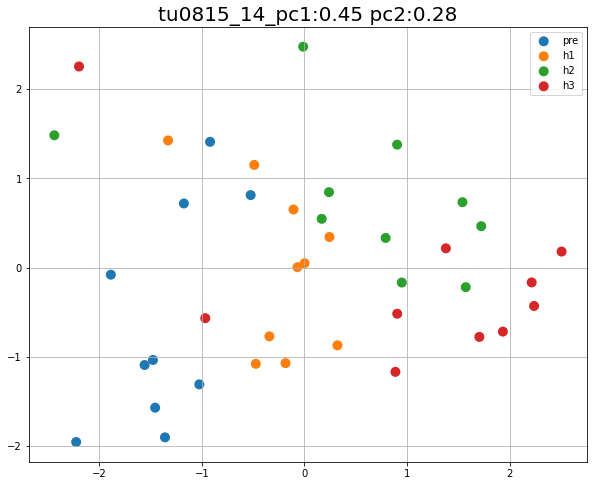

<Figure size 432x288 with 0 Axes>

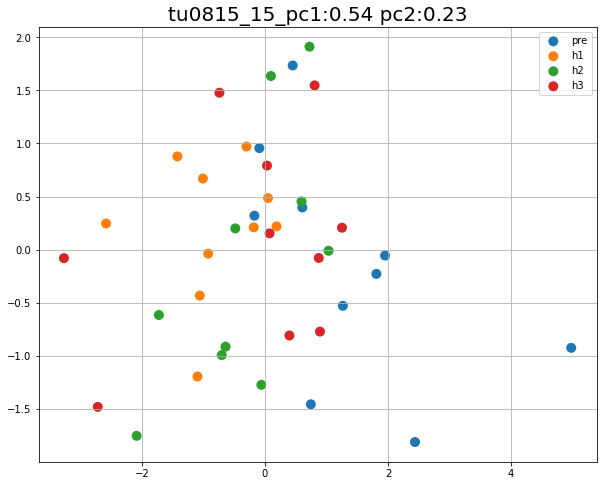

<Figure size 432x288 with 0 Axes>

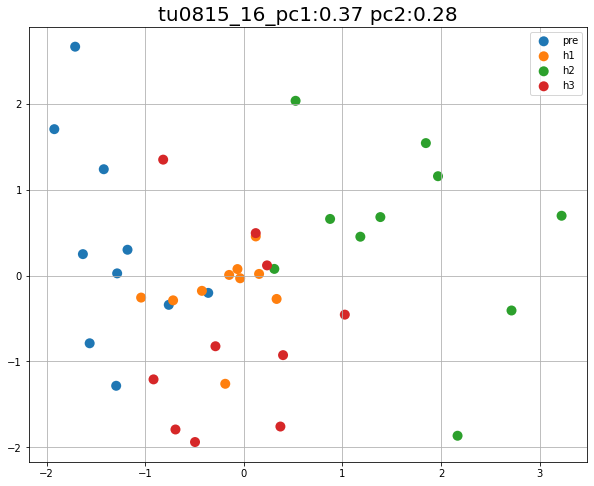

<Figure size 432x288 with 0 Axes>

In [35]:
import seaborn as sns
D=[]
for filename in listdir(mypath): 
    fullpath = join(mypath,filename)
    D.append(getsepDatatime(fullpath))
for i in range(16):
    Data= pd.DataFrame()    
    for j in range(len(D)):
        Data=pd.concat([Data, D[j][i]], axis=0)   
        # 使用 scikit-learn 內建的 API 正規化
    scaler = StandardScaler()
    Z= scaler.fit_transform(Data)  # 注意維度
    
    # 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
    # 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
    n_components = 2
    random_state = 9527
    pca = PCA(n_components=n_components, 
              random_state=random_state)
    # 注意我們是對正規化後的特徵 Z 做 PCA
    L = pca.fit_transform(Z)  # (n_samples, n_components)

    # 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸
    fig, ax = plt.subplots(figsize=(10,8))

    for j in range(len(lo)):
        ax.scatter(L[lo[j],0], L[lo[j],1],  label=label[j],
                    edgecolors='none',s=100)
    s=np.round(pca.explained_variance_ratio_, 2)

    plt.title(patient+'_'+str(i+1)+'_pc1:'+str(s[0])+' pc2:'+str(s[1]), fontsize =20)
    
    ax.legend()
    ax.grid(True)
    plt.show()
    pcs = np.array(pca.components_) # (n_comp, n_features)

    df_pc = pd.DataFrame(pcs, columns=Data.columns[:])
    df_pc.index = [f"{i+1}cha_{c}_component" for c in['one', 'second']]
    df_pc.style\
        .background_gradient(cmap='bwr_r', axis=None)\
        .format("{:.2}")
    df_pc.to_csv(folder+'_time_df'+str(i+1)+'.csv')
    fig.savefig(folder+'_time_pca'+str(i+1)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
    plt.figure().clear()

# 將多個csv檔案合併成一個檔案

In [36]:
import csv
from pathlib import Path
# 讀入檔案
rows =[]
# 最初讀入時，header也要讀入
for file in Path(patient).glob("*.csv"):
    if(file==(folder+patient+'_df.csv')):
        continue
    f = open(file)
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
    rows.append([''])
    f.close()
for folder, subfolders, files in os.walk(patient+'/'):        
    for file in files:        
        # checking if file is 
        # of .csv type 
        if file.endswith('.csv'): 
            path = os.path.join(folder, file) 
                
            # deleting the csv file 
            os.remove(path)
# 寫入檔案
f = open(folder+patient+'_df.csv',mode='w', newline="")
writer = csv.writer(f)
for row in rows:
    writer.writerow(row)
f.close()

# barchart

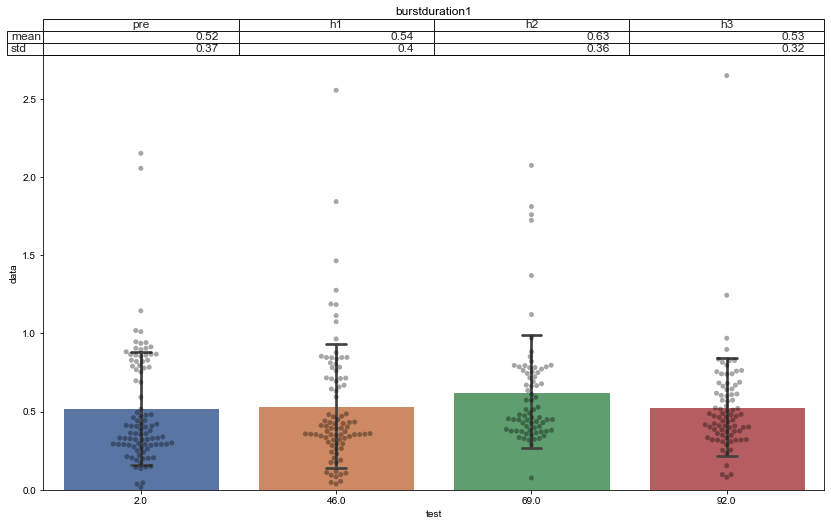

<Figure size 432x288 with 0 Axes>

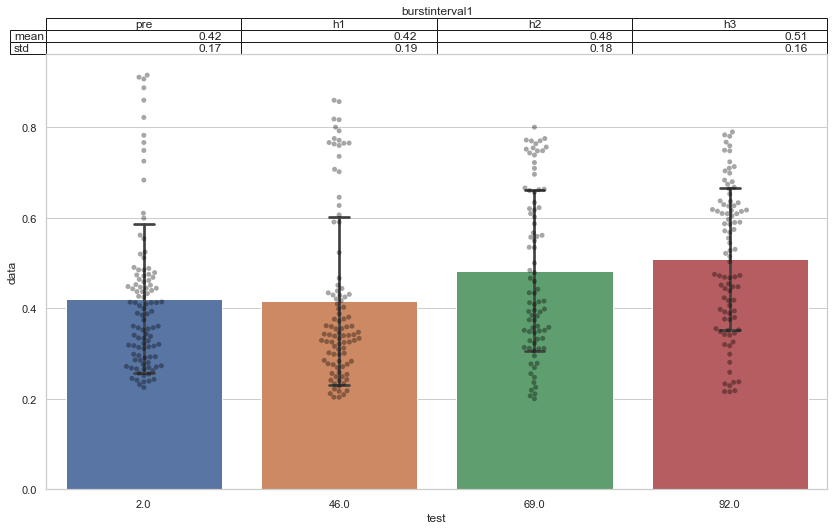

<Figure size 432x288 with 0 Axes>

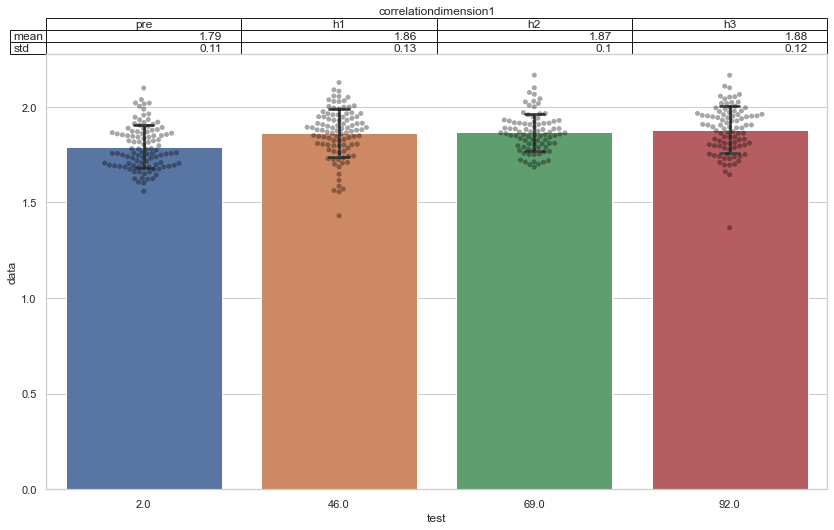

<Figure size 432x288 with 0 Axes>

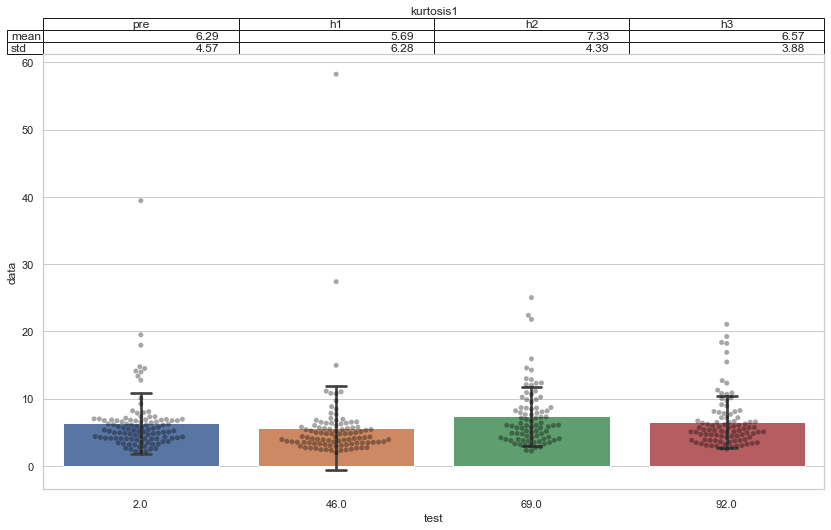

<Figure size 432x288 with 0 Axes>

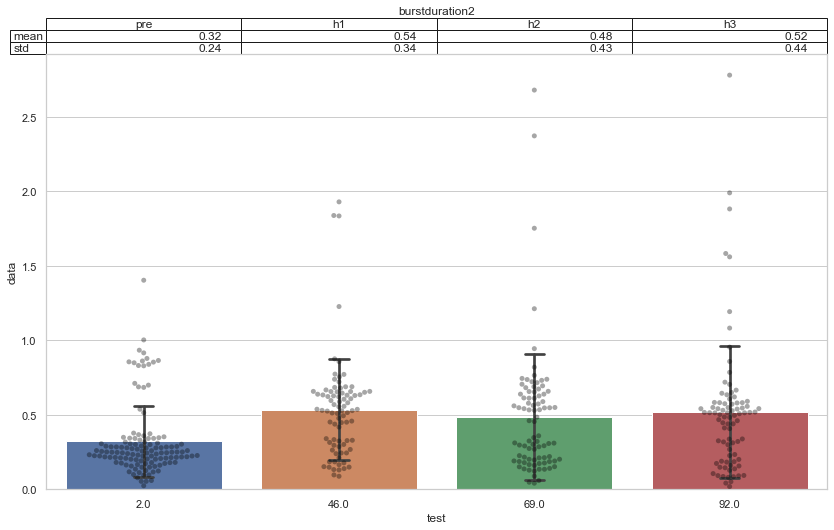

<Figure size 432x288 with 0 Axes>

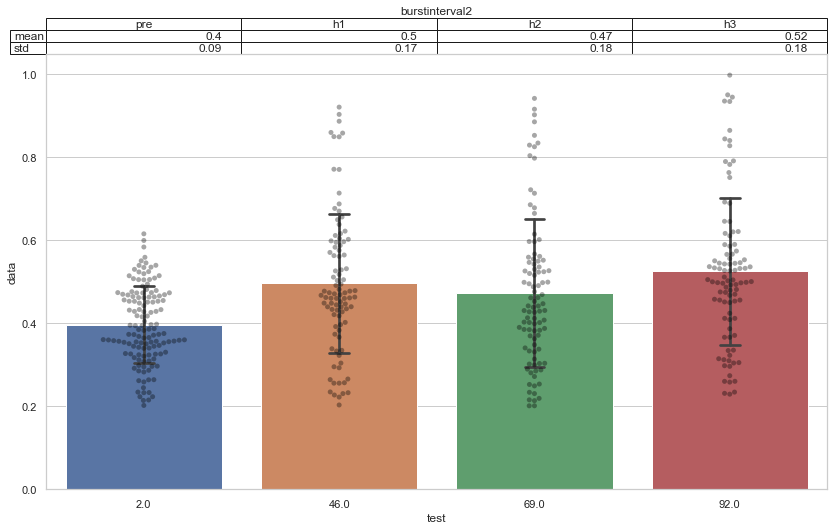

<Figure size 432x288 with 0 Axes>

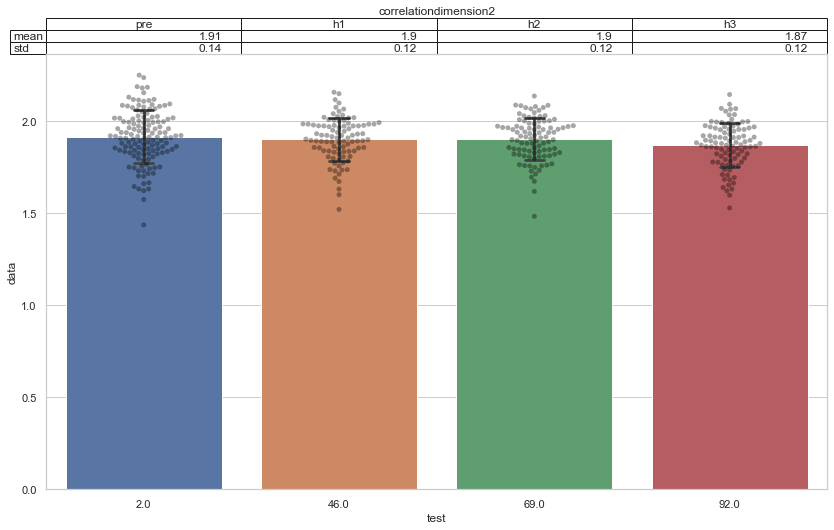

<Figure size 432x288 with 0 Axes>

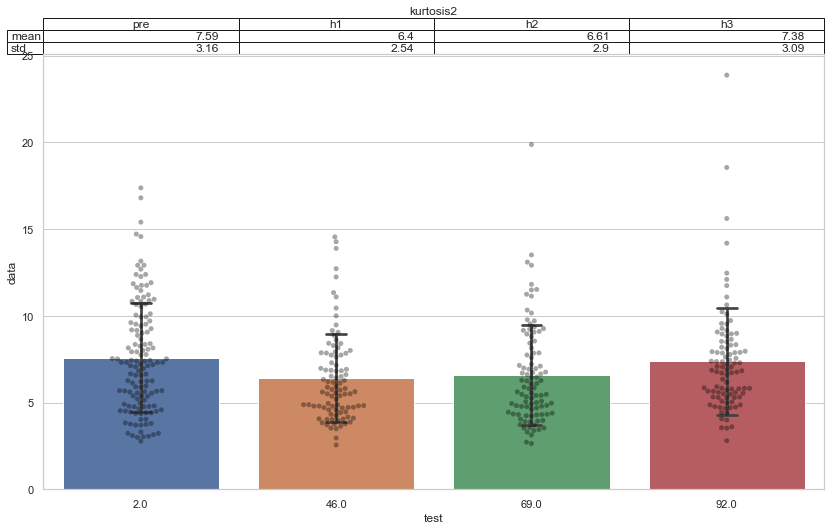

<Figure size 432x288 with 0 Axes>

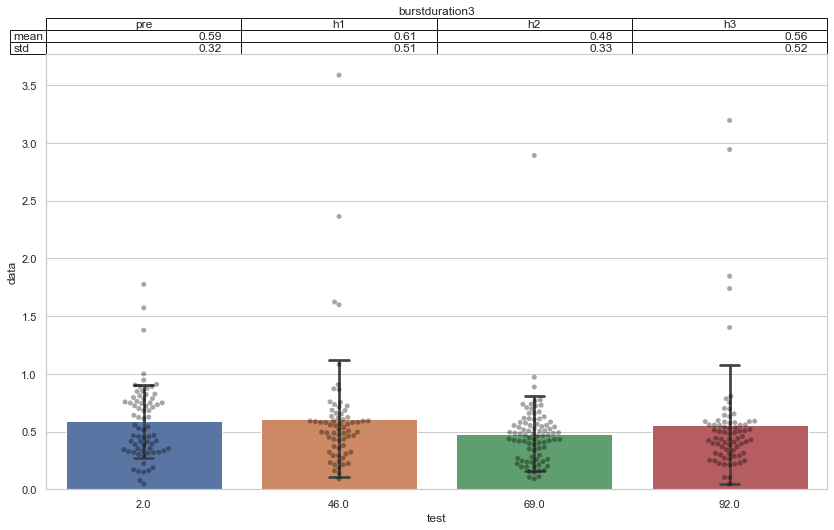

<Figure size 432x288 with 0 Axes>

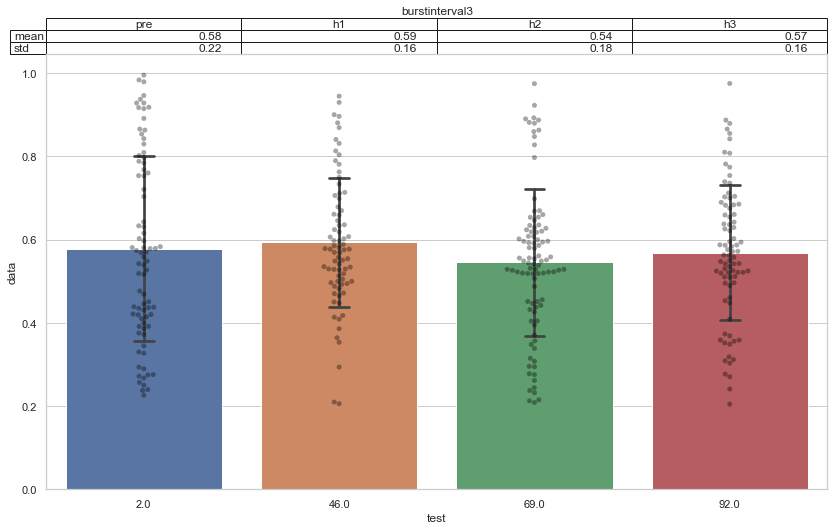

<Figure size 432x288 with 0 Axes>

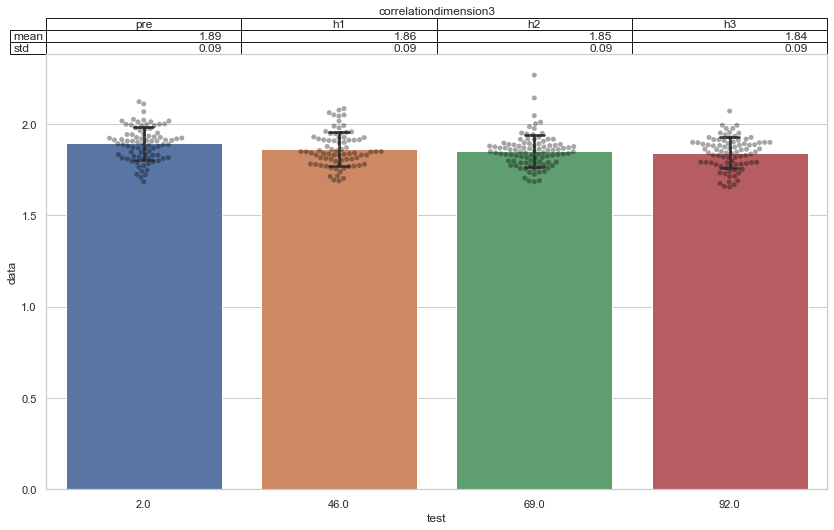

<Figure size 432x288 with 0 Axes>

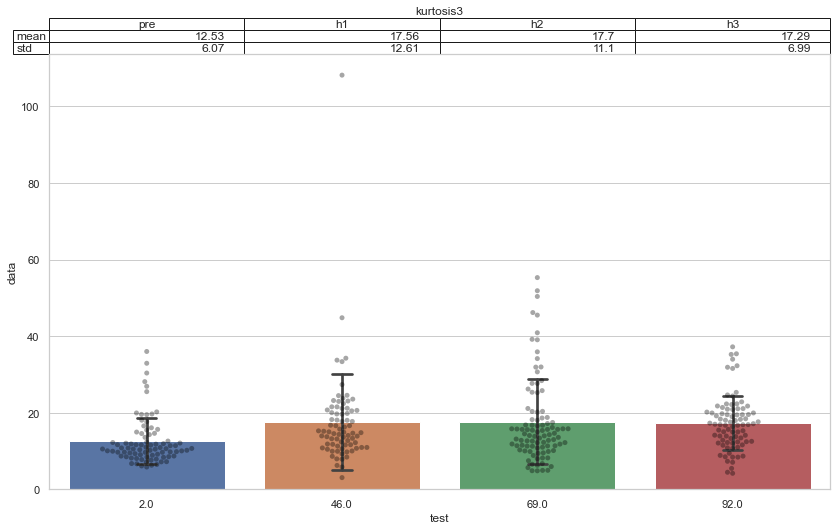

<Figure size 432x288 with 0 Axes>

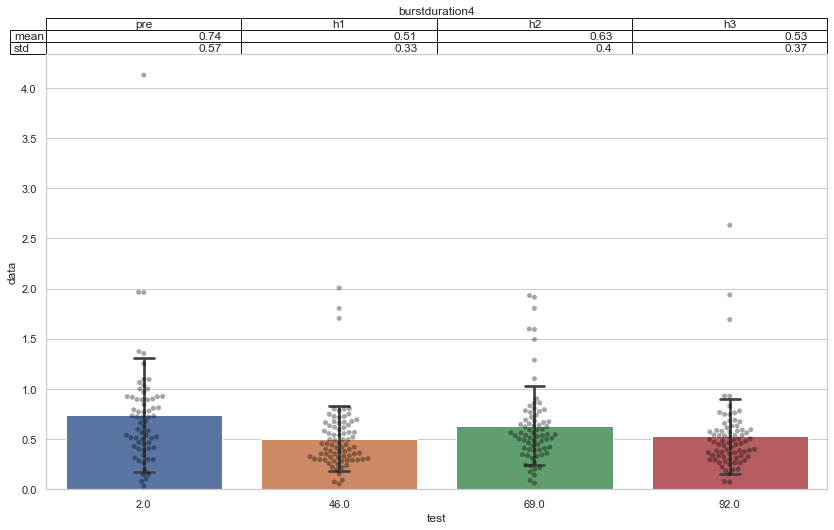

<Figure size 432x288 with 0 Axes>

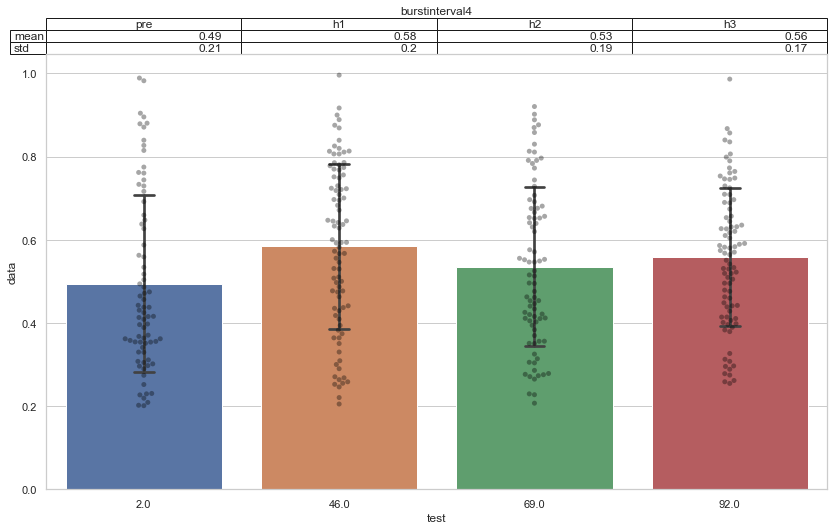

<Figure size 432x288 with 0 Axes>

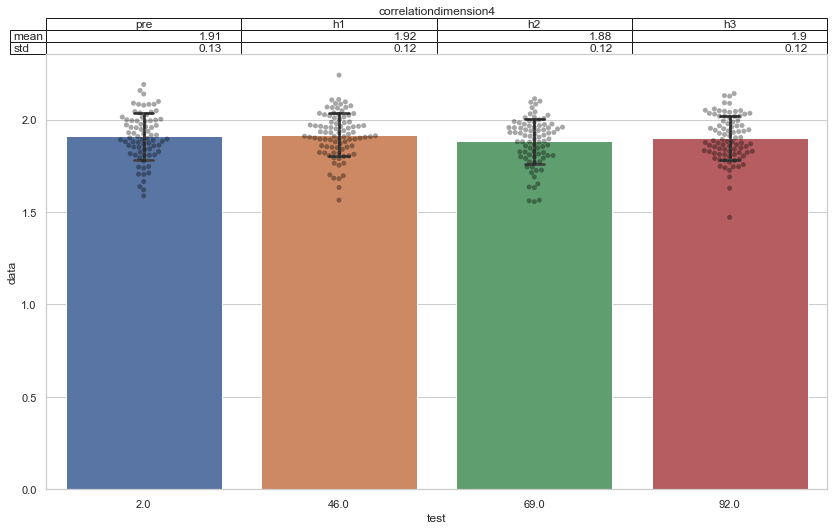

<Figure size 432x288 with 0 Axes>

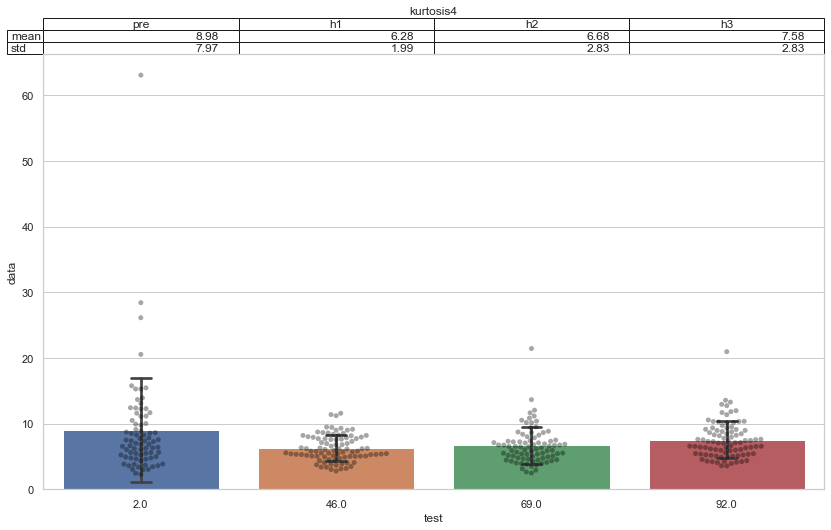

<Figure size 432x288 with 0 Axes>

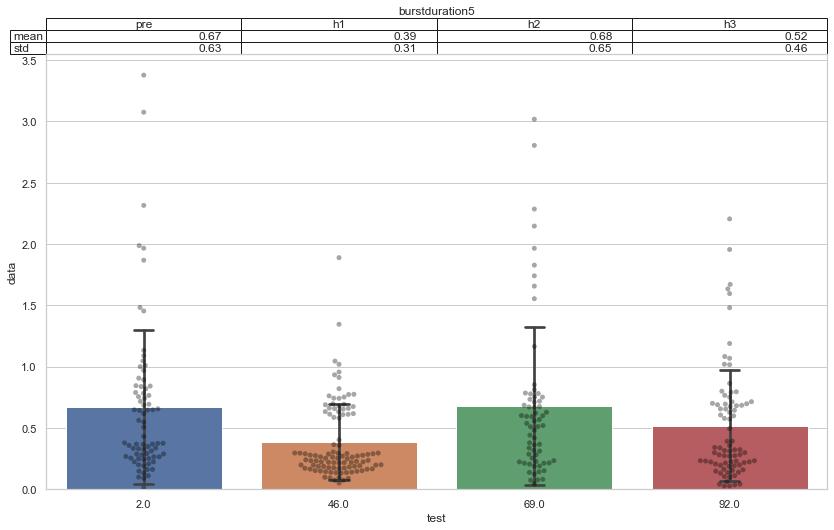

<Figure size 432x288 with 0 Axes>

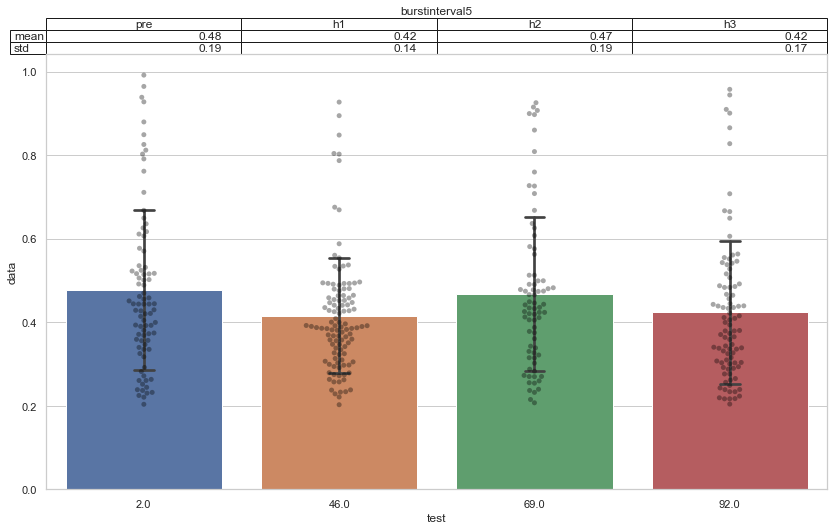

<Figure size 432x288 with 0 Axes>

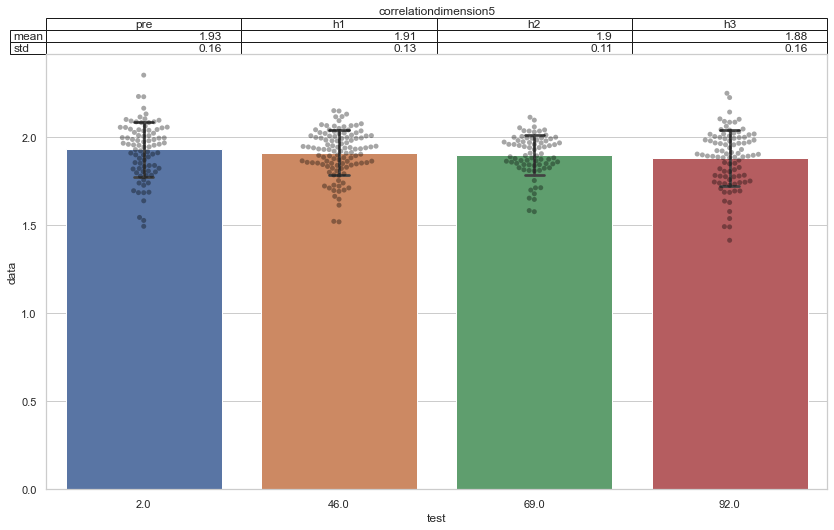

<Figure size 432x288 with 0 Axes>

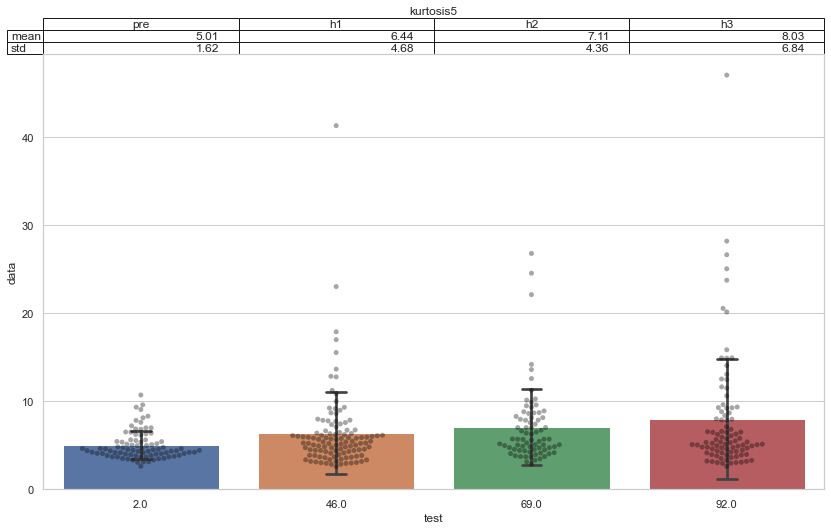

<Figure size 432x288 with 0 Axes>

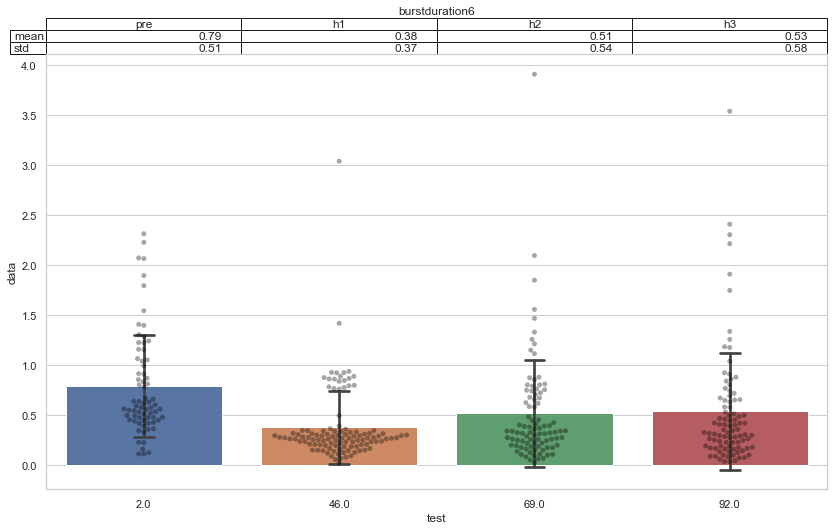

<Figure size 432x288 with 0 Axes>

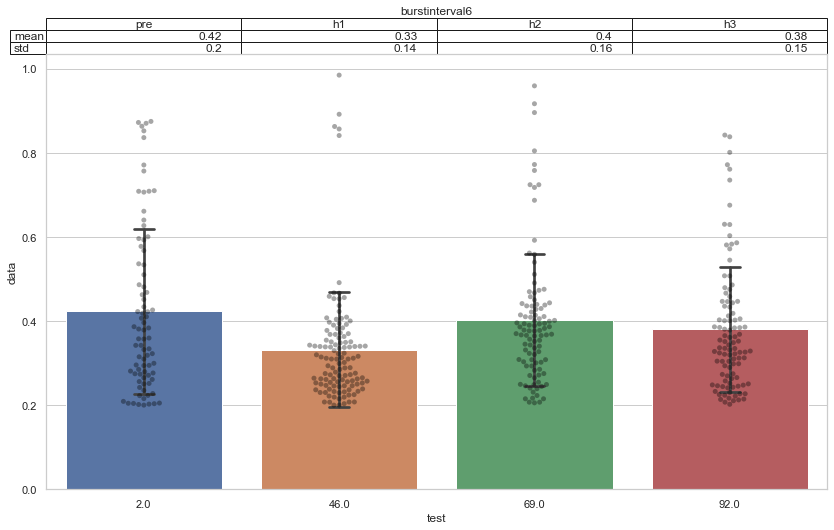

<Figure size 432x288 with 0 Axes>

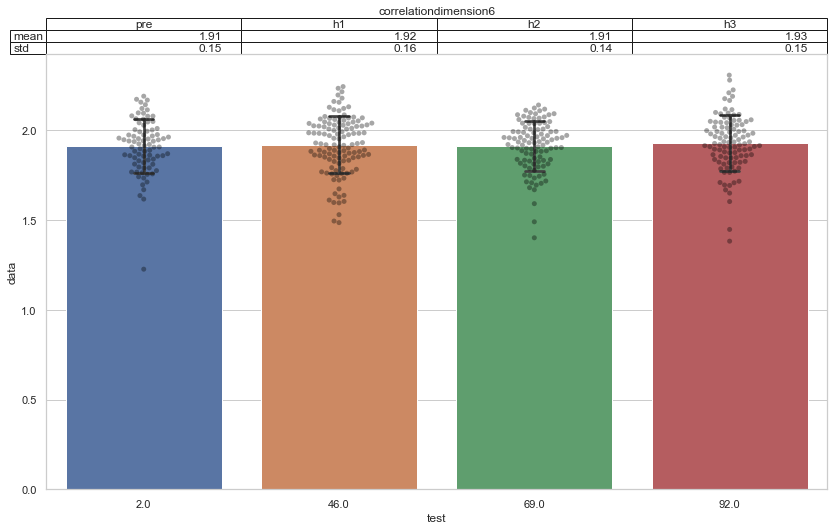

<Figure size 432x288 with 0 Axes>

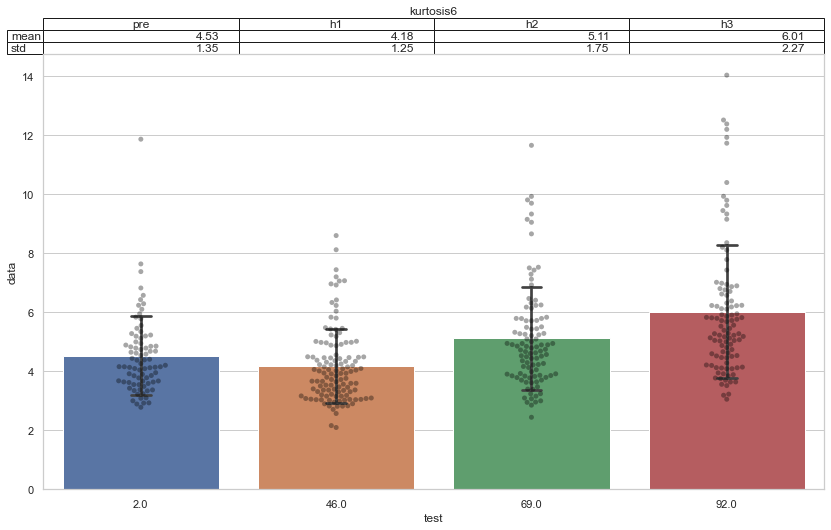

<Figure size 432x288 with 0 Axes>

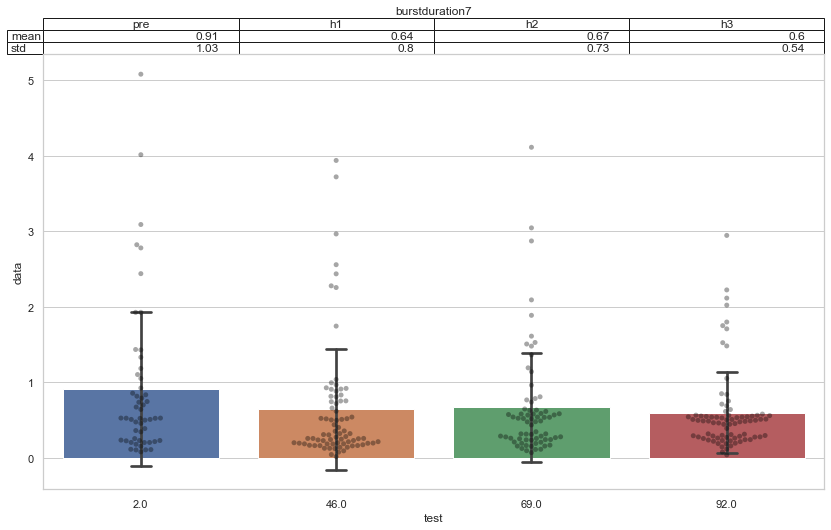

<Figure size 432x288 with 0 Axes>

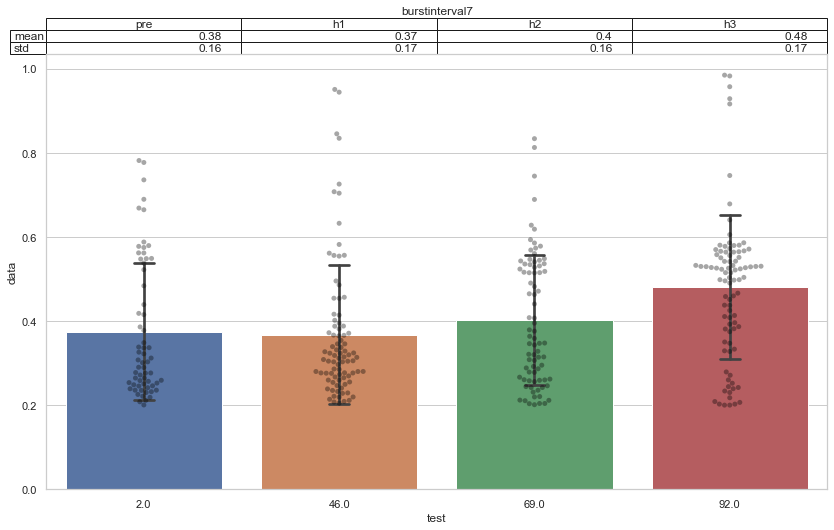

<Figure size 432x288 with 0 Axes>

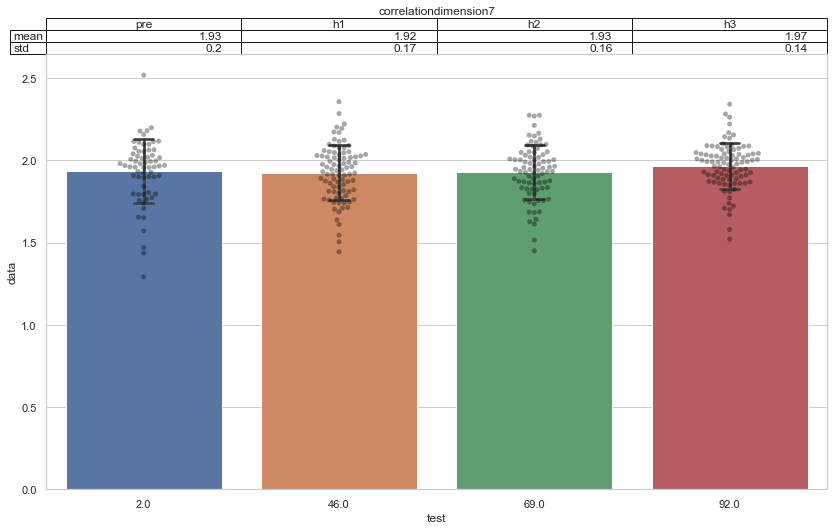

<Figure size 432x288 with 0 Axes>

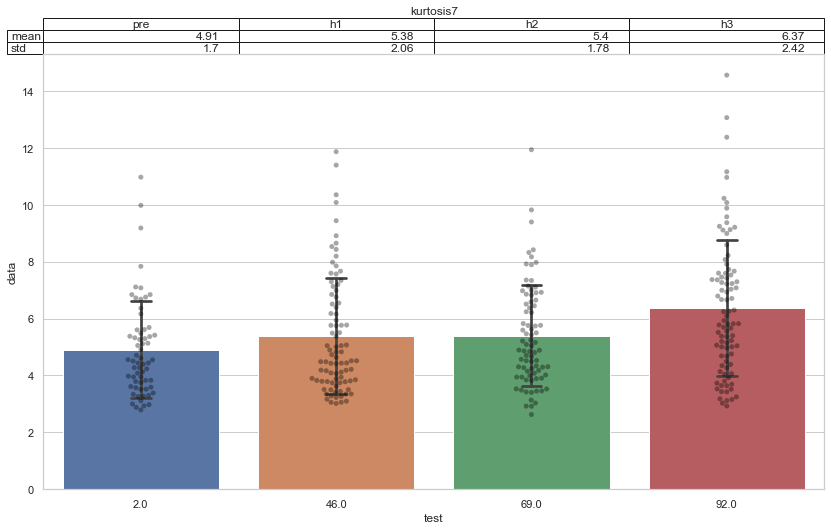

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

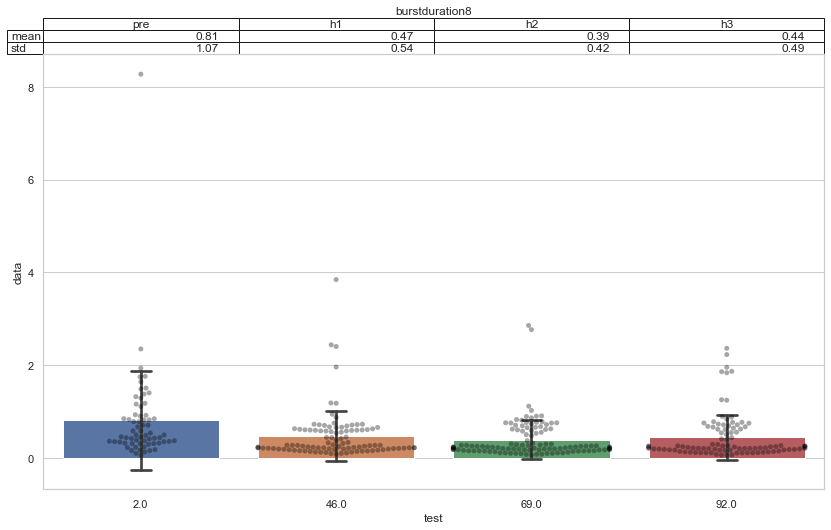

<Figure size 432x288 with 0 Axes>

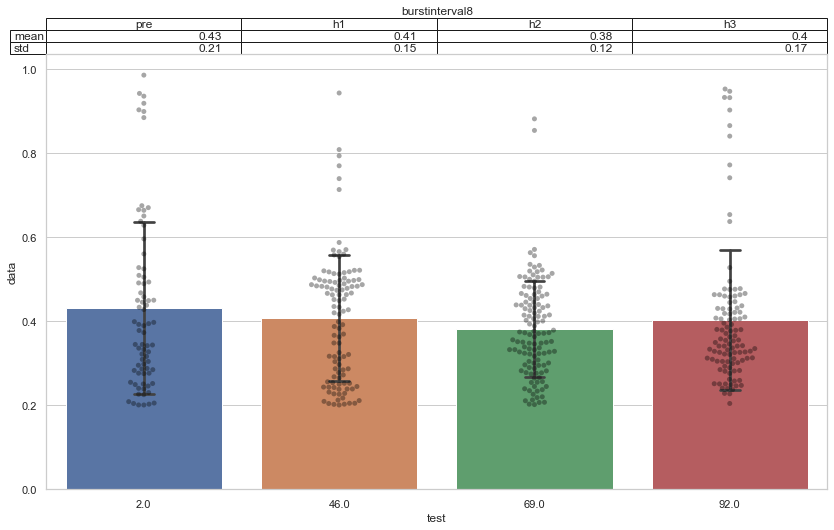

<Figure size 432x288 with 0 Axes>

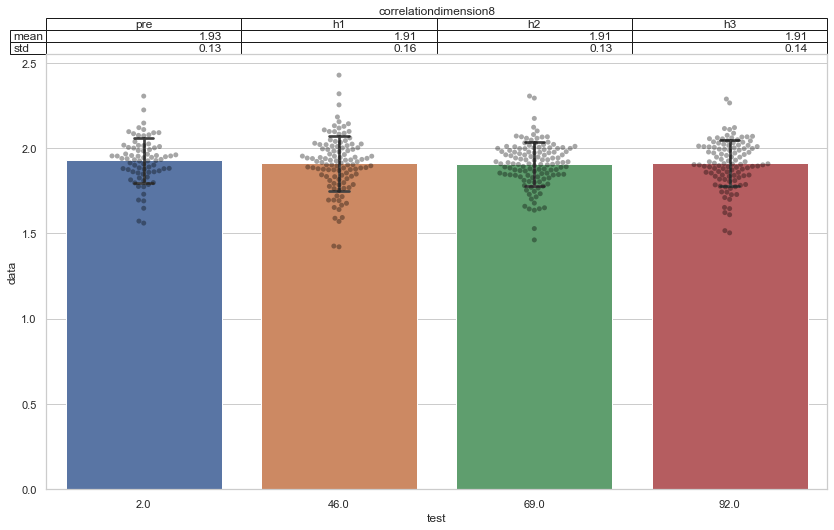

<Figure size 432x288 with 0 Axes>

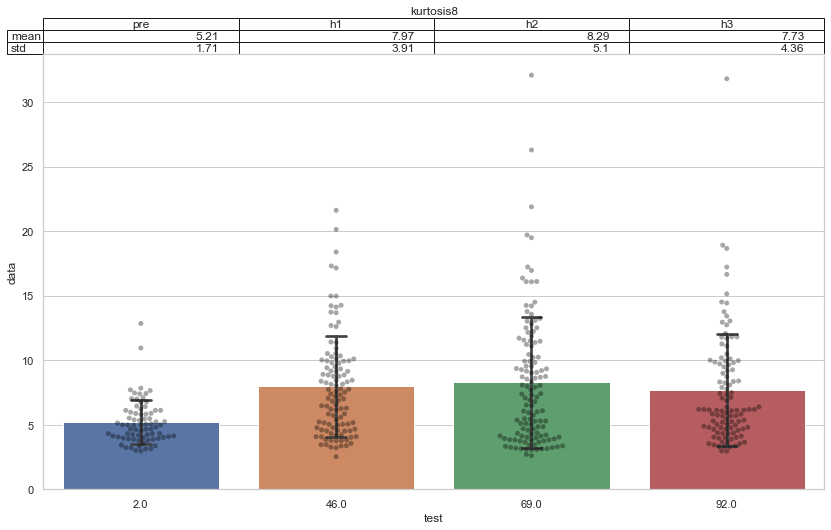

<Figure size 432x288 with 0 Axes>

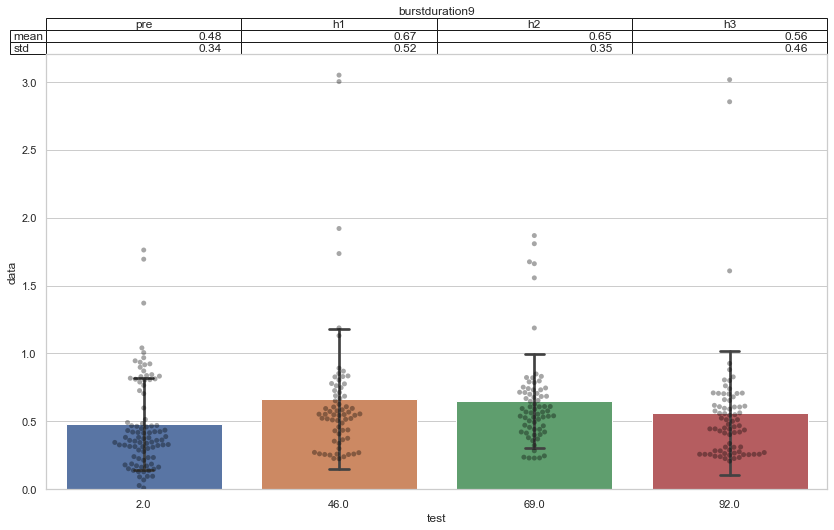

<Figure size 432x288 with 0 Axes>

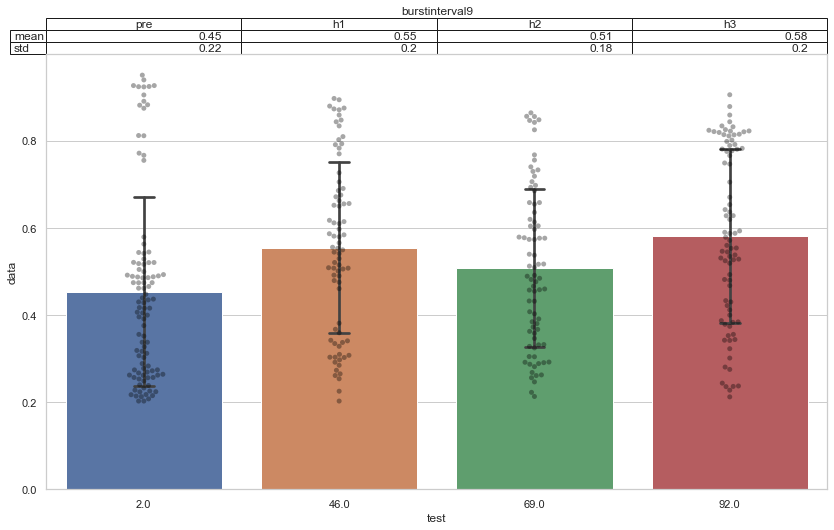

<Figure size 432x288 with 0 Axes>

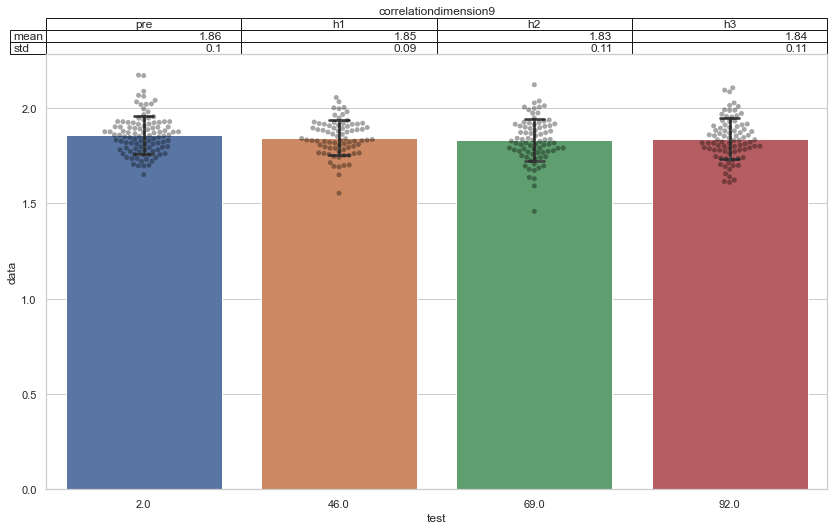

<Figure size 432x288 with 0 Axes>

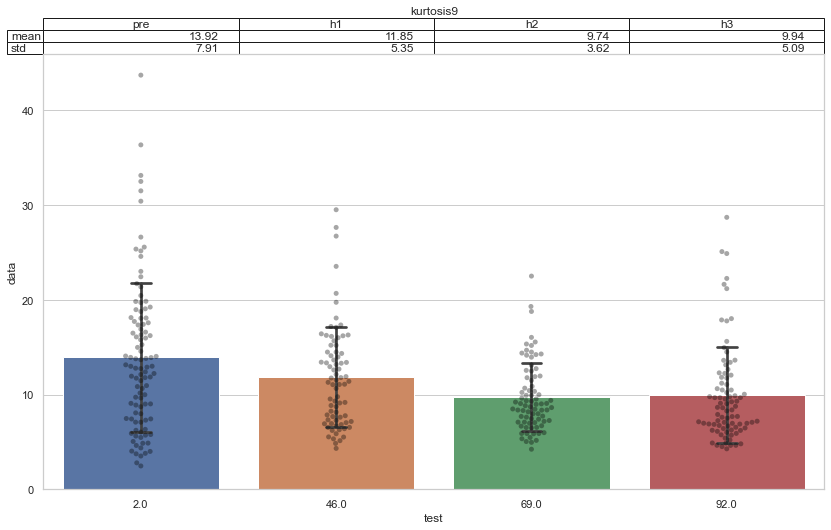

<Figure size 432x288 with 0 Axes>

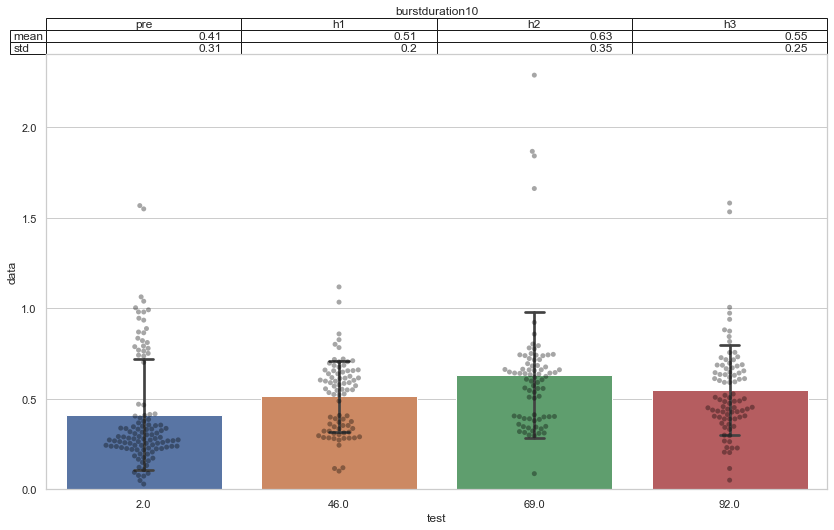

<Figure size 432x288 with 0 Axes>

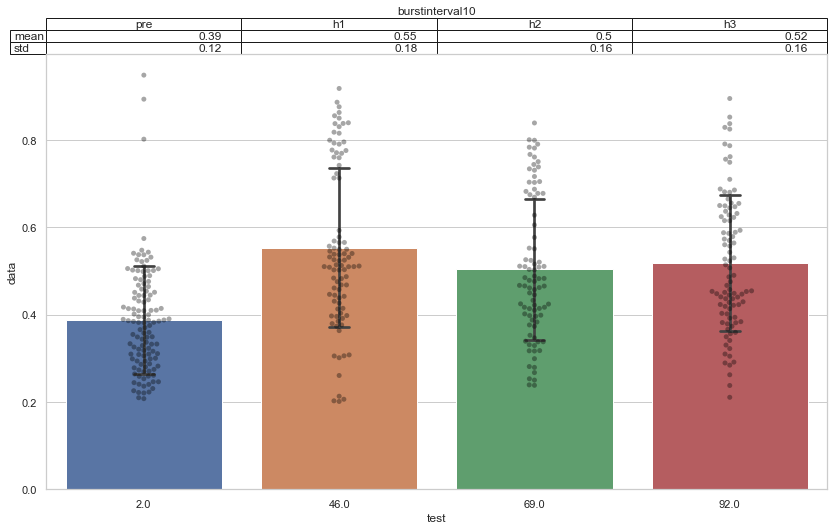

<Figure size 432x288 with 0 Axes>

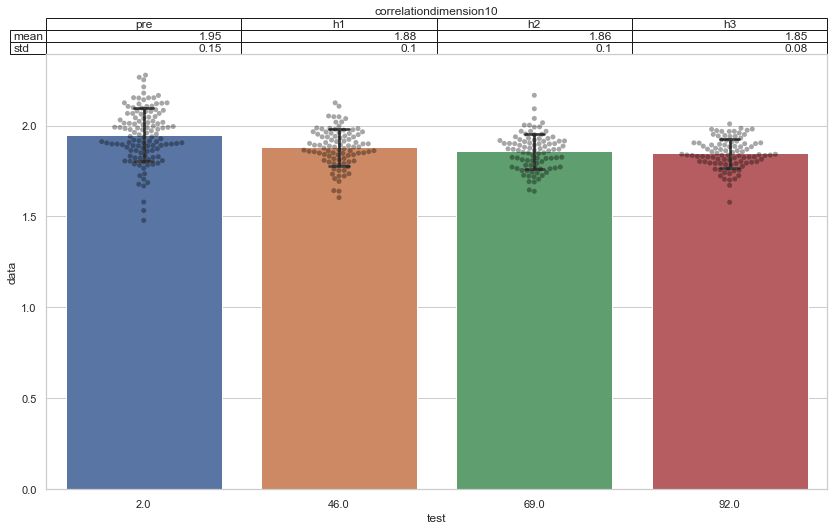

<Figure size 432x288 with 0 Axes>

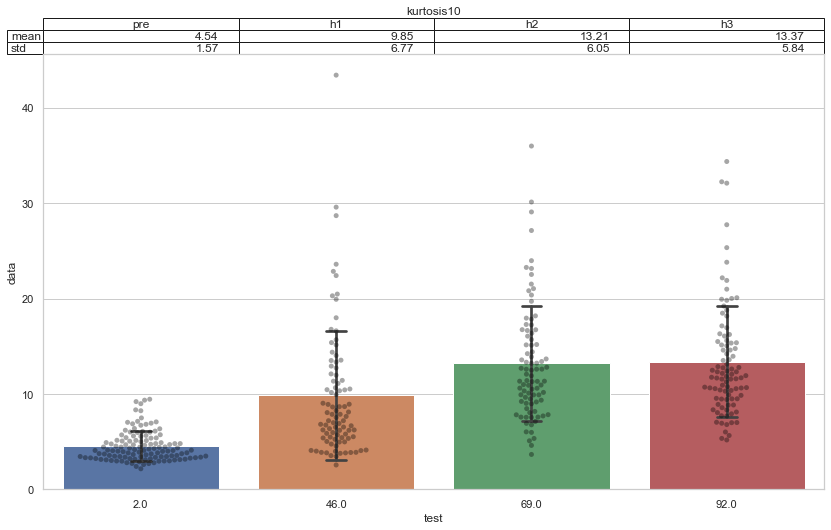

<Figure size 432x288 with 0 Axes>

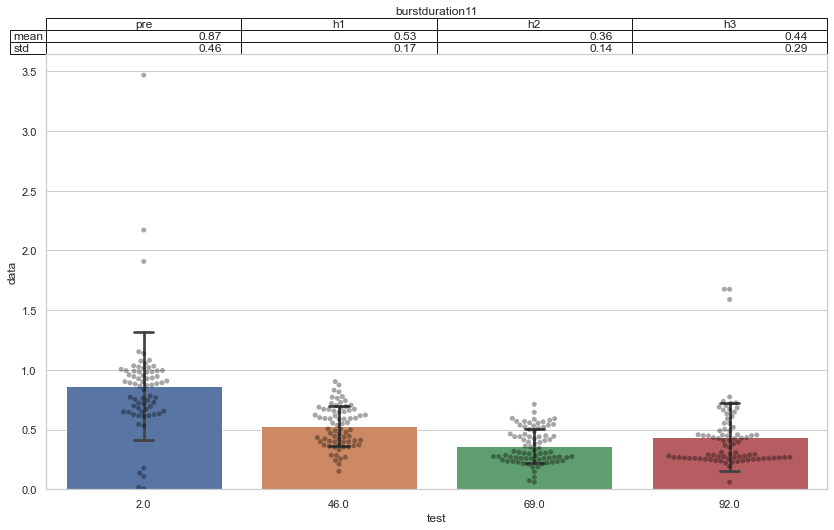

<Figure size 432x288 with 0 Axes>

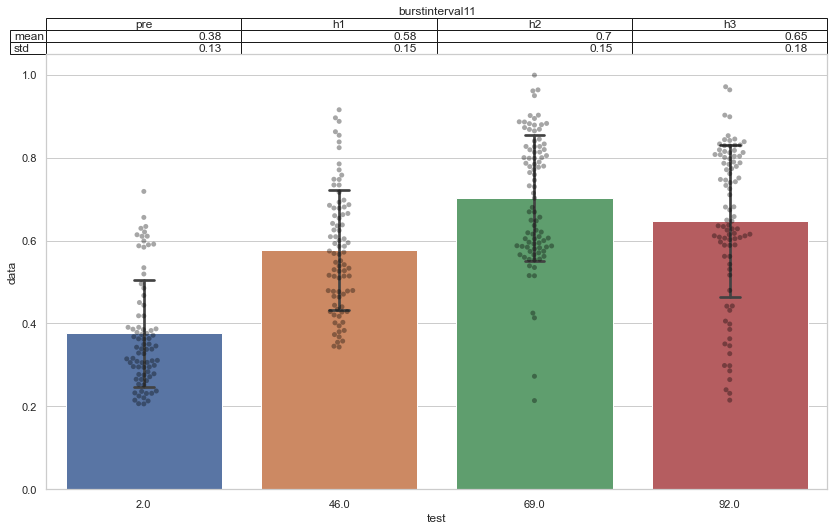

<Figure size 432x288 with 0 Axes>

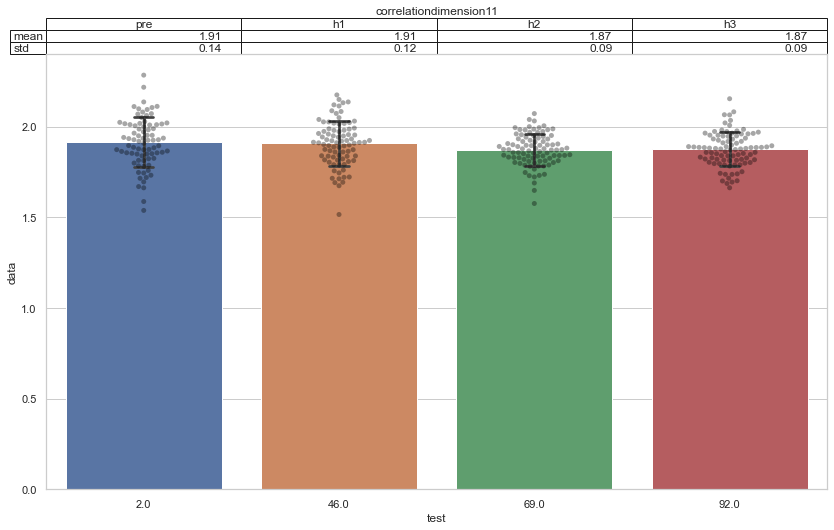

<Figure size 432x288 with 0 Axes>

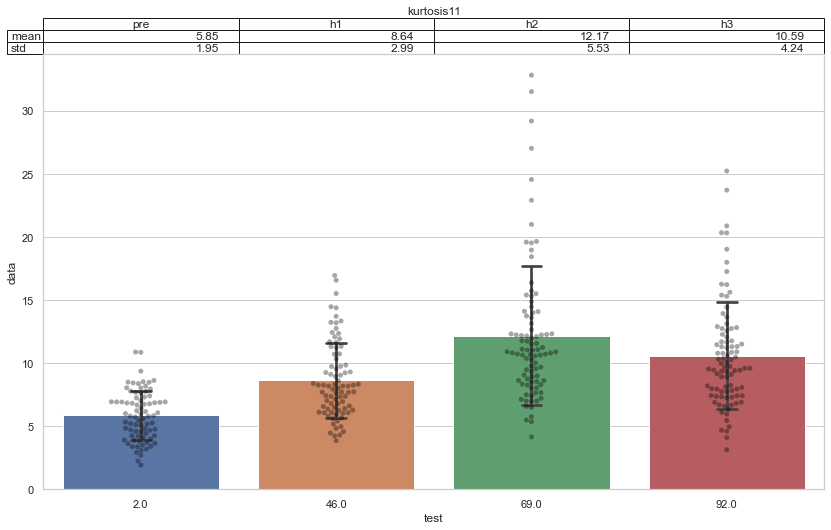

<Figure size 432x288 with 0 Axes>

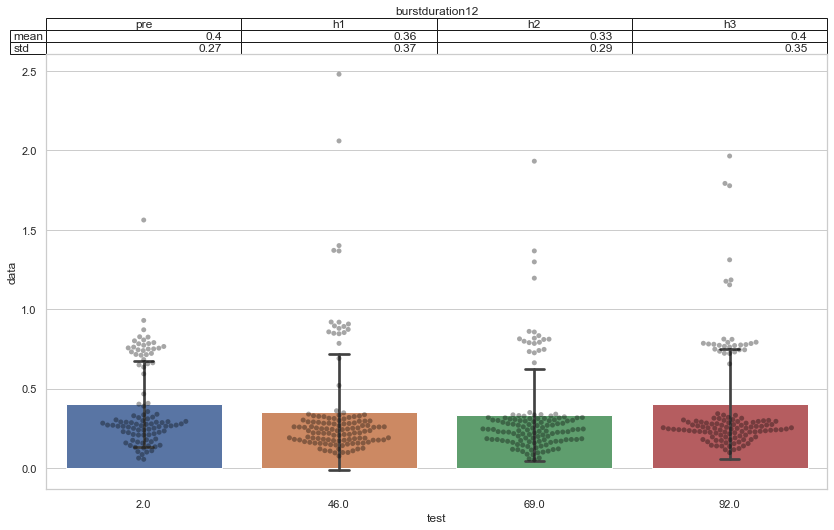

<Figure size 432x288 with 0 Axes>

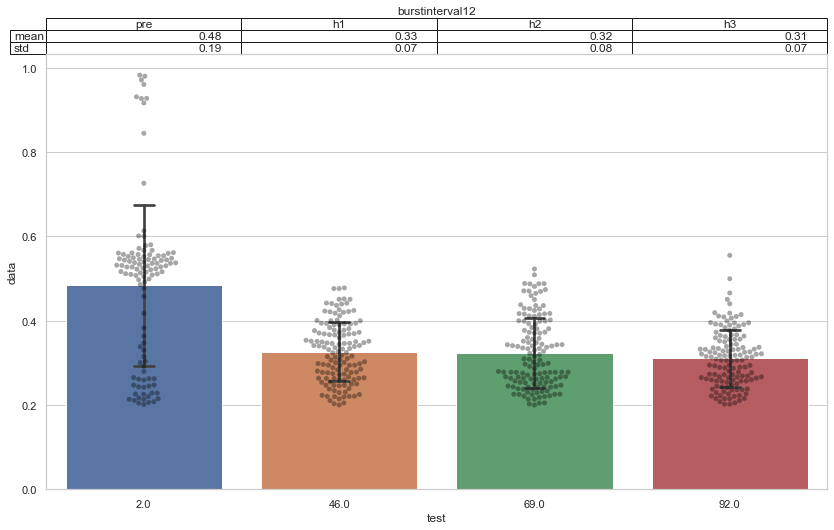

<Figure size 432x288 with 0 Axes>

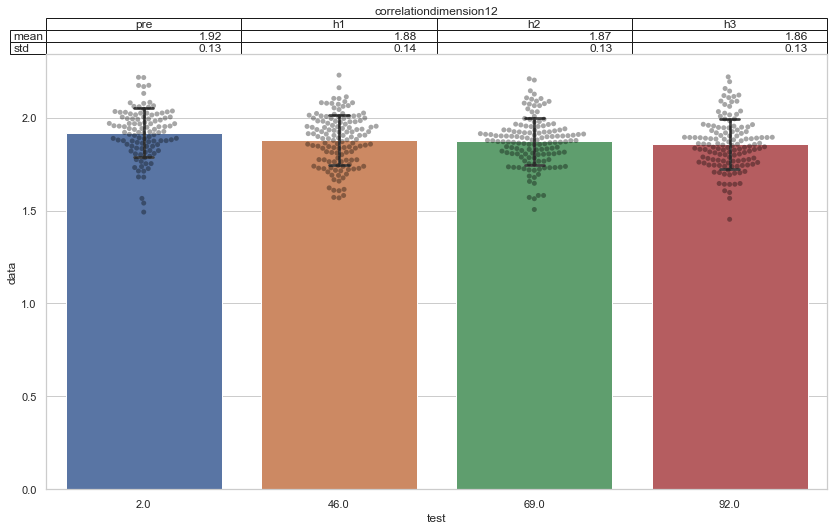

<Figure size 432x288 with 0 Axes>

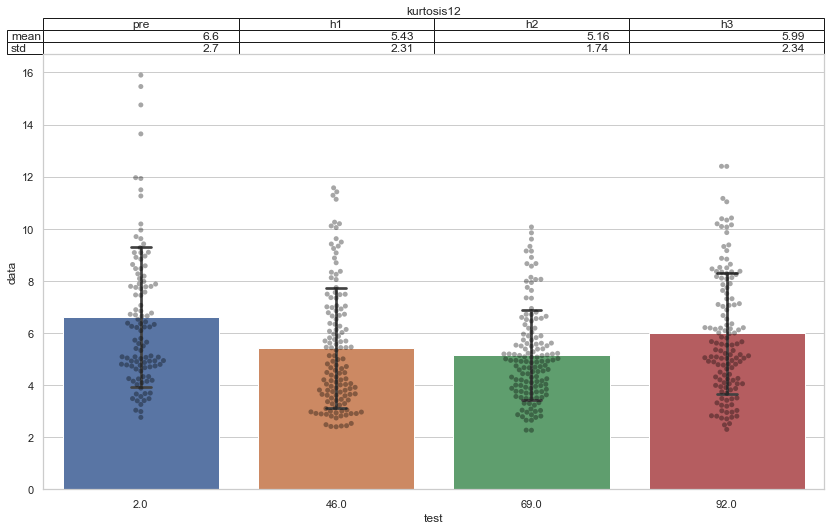

<Figure size 432x288 with 0 Axes>

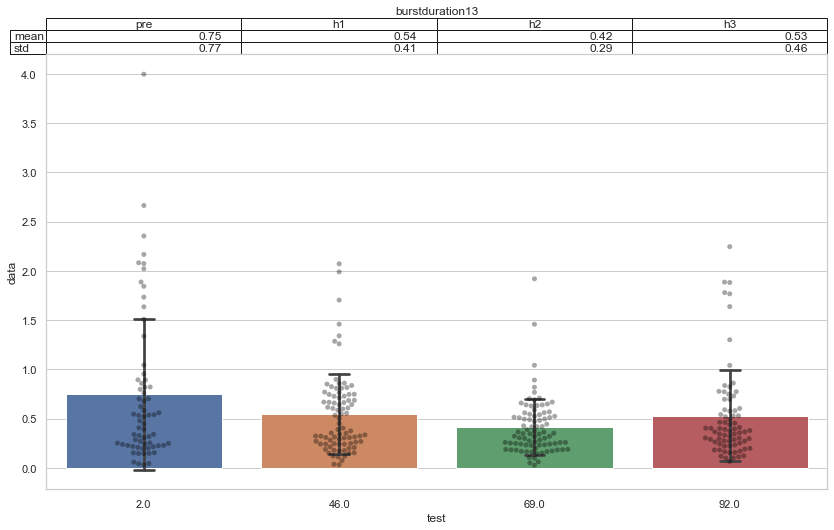

<Figure size 432x288 with 0 Axes>

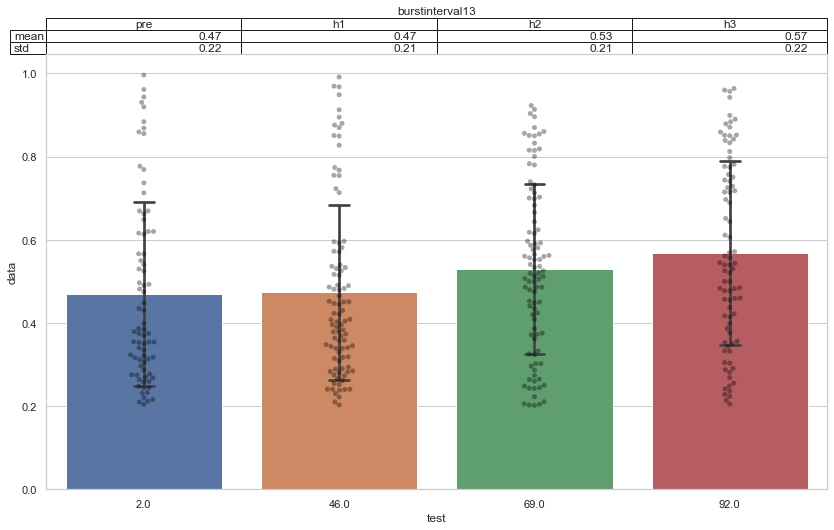

<Figure size 432x288 with 0 Axes>

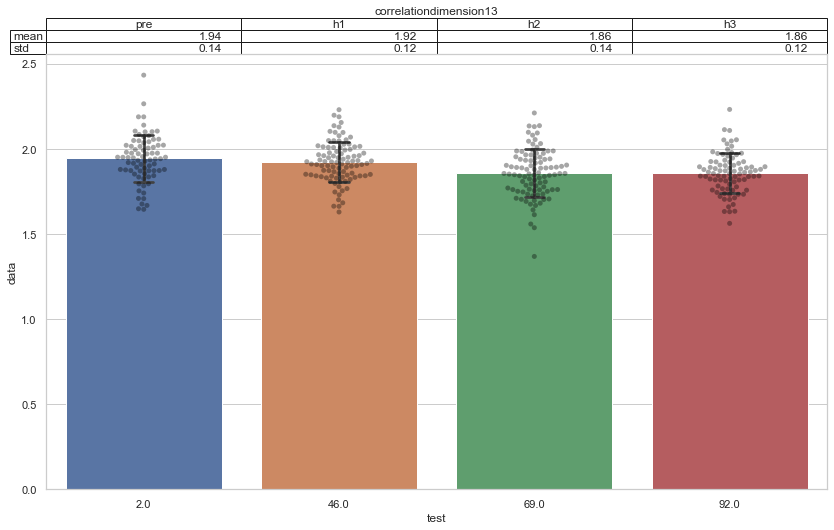

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

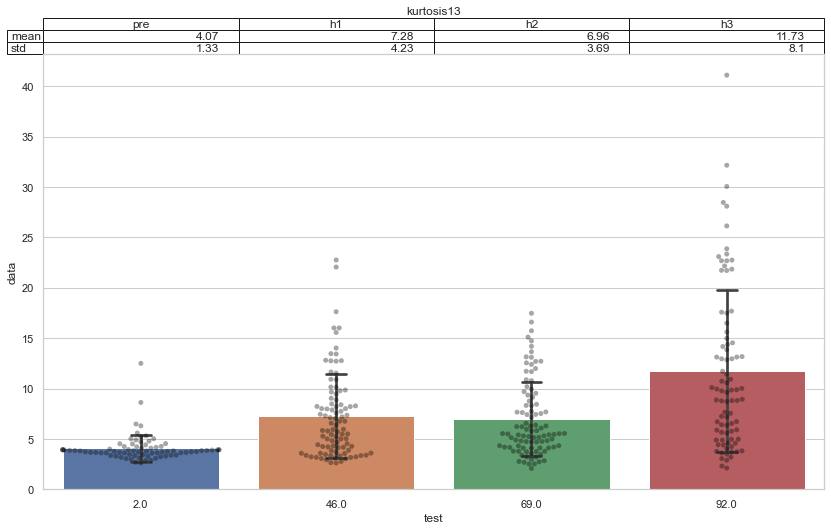

<Figure size 432x288 with 0 Axes>

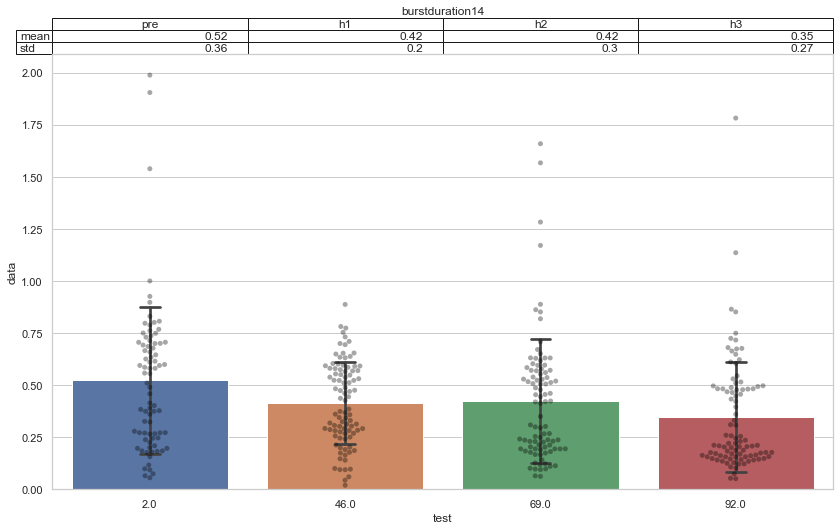

<Figure size 432x288 with 0 Axes>

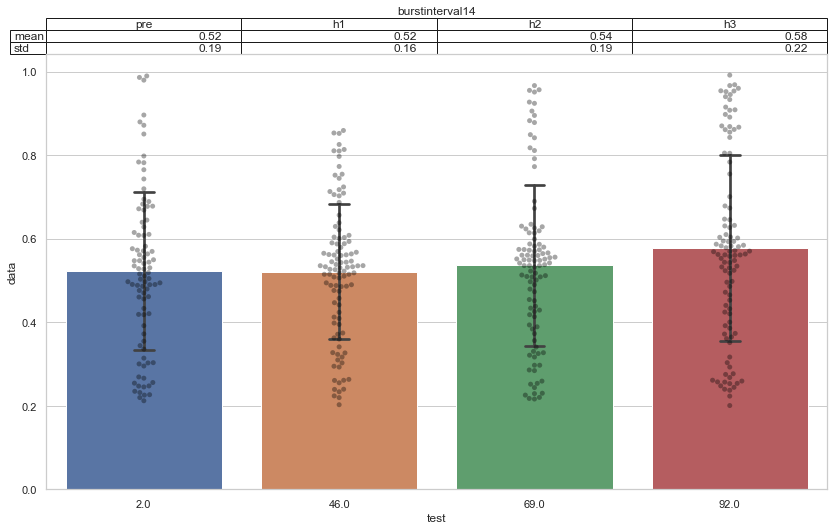

<Figure size 432x288 with 0 Axes>

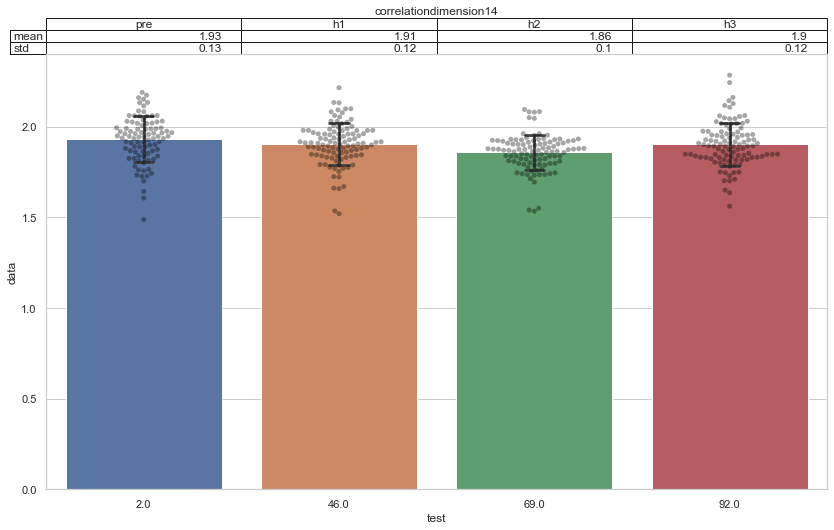

<Figure size 432x288 with 0 Axes>

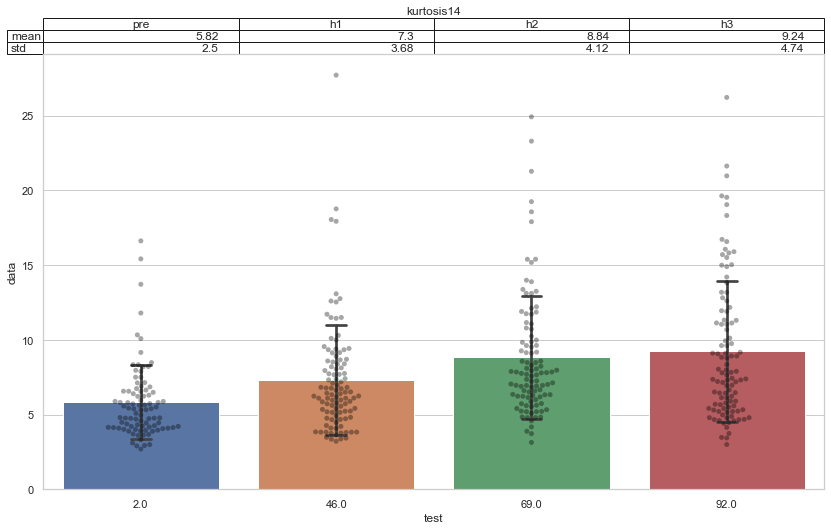

<Figure size 432x288 with 0 Axes>

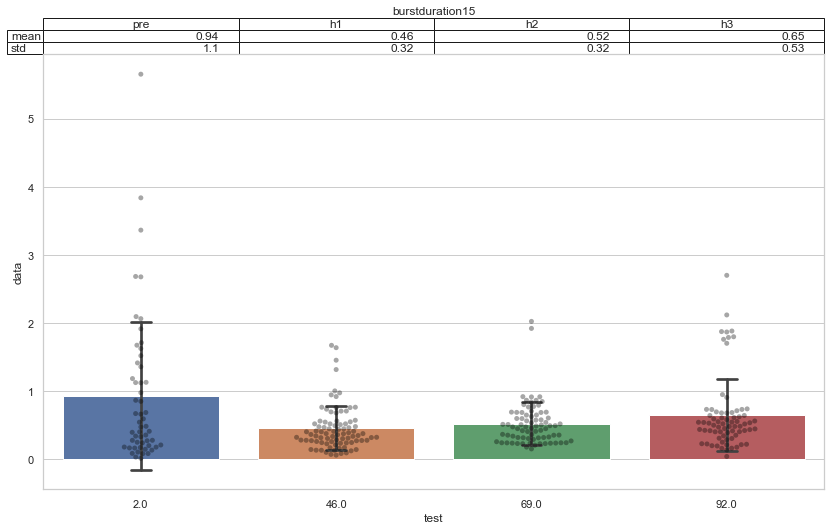

<Figure size 432x288 with 0 Axes>

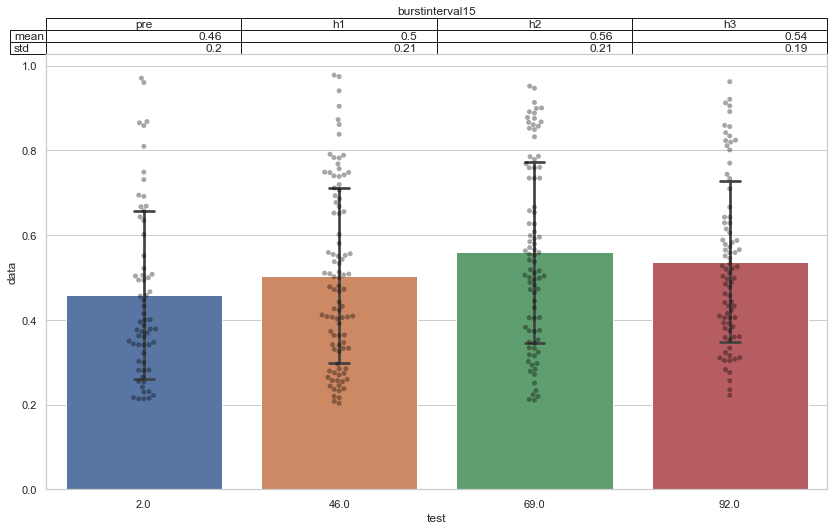

<Figure size 432x288 with 0 Axes>

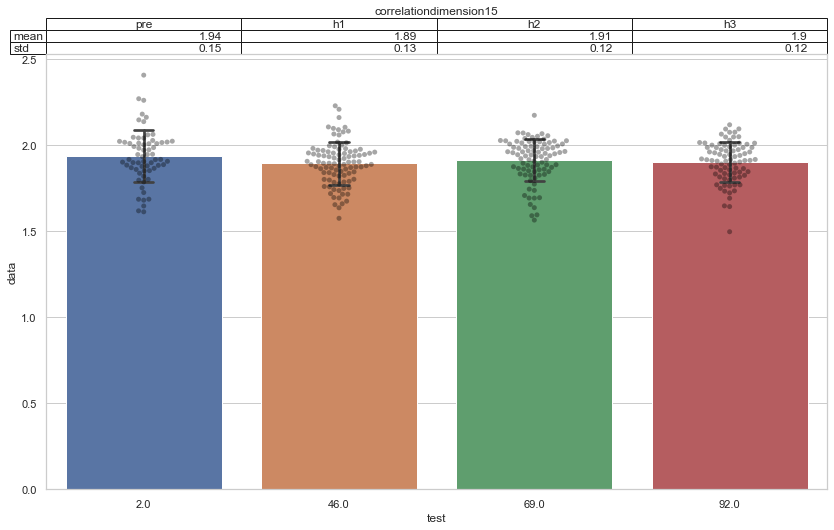

<Figure size 432x288 with 0 Axes>

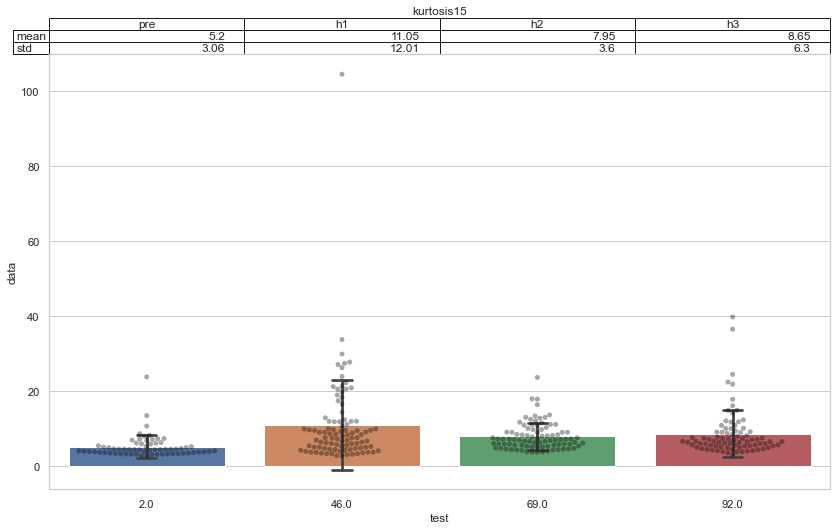

<Figure size 432x288 with 0 Axes>

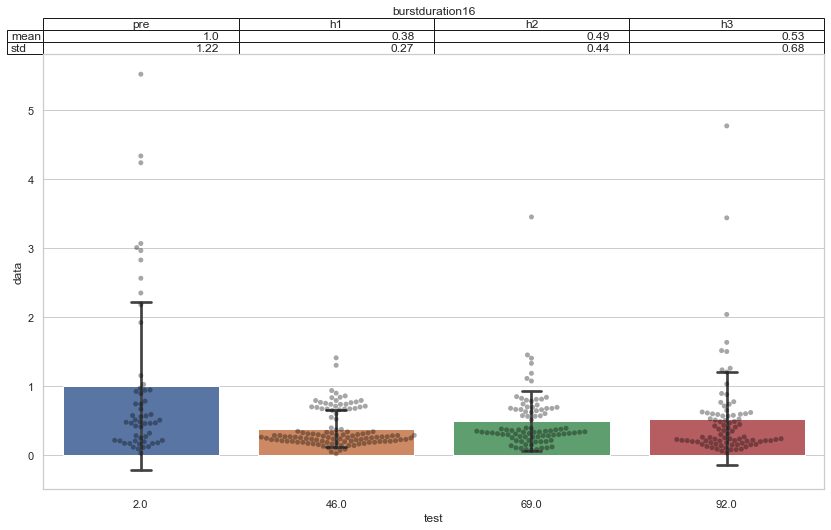

<Figure size 432x288 with 0 Axes>

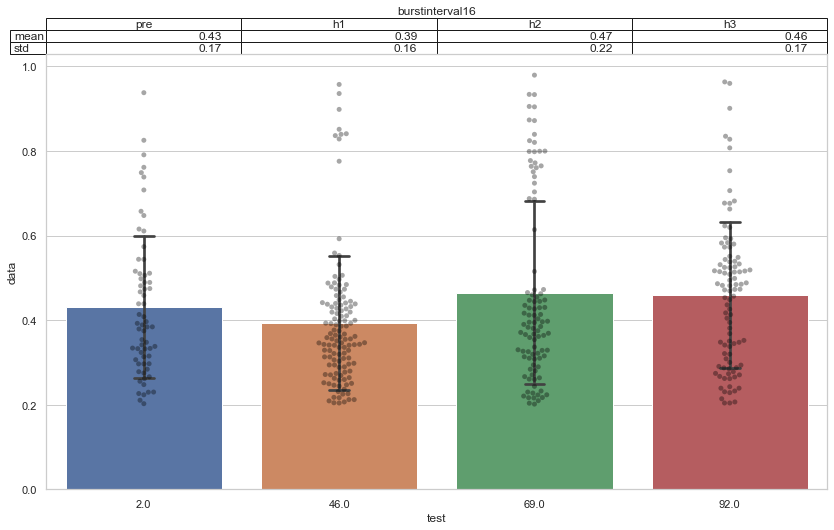

<Figure size 432x288 with 0 Axes>

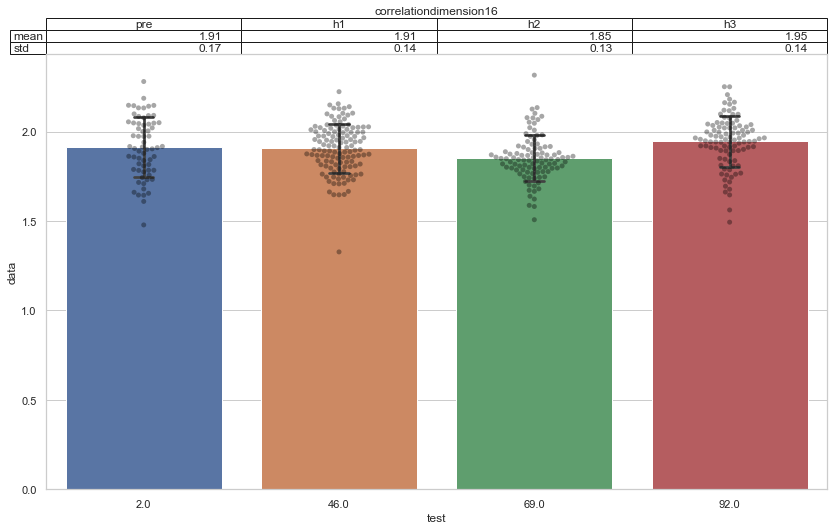

<Figure size 432x288 with 0 Axes>

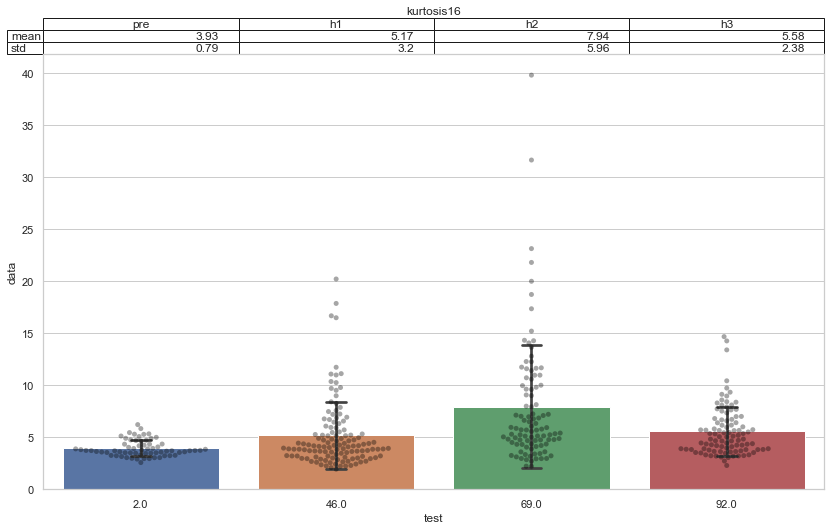

<Figure size 432x288 with 0 Axes>

In [37]:
df = pd.DataFrame()
data=[]
index=['burstduration','burstinterval','correlationdimension','kurtosis']
rows=["mean","std"]
for i in range(16):
    Data = pd.DataFrame()
    for filename in listdir(mypath):  
        fullpath = join(mypath,filename)
        name=fullpath.split("_")[testorder]   
        for t in test:
            if ((testname+str(t)) in name):
                data = pd.read_excel(fullpath, sheet_name=None)
                sheet = pd.ExcelFile(fullpath)               

                le=len(getburst(data)[4][i])                 
                my_array = np.array([np.full(le,int(t)),np.full(le,i),np.full(le,0),getburst(data)[4][i]])
                
                my_array=my_array.transpose((1, 0))
                df = pd.DataFrame(my_array, columns = ['test','pca','part','data'])
                Data=pd.concat([Data, df], axis=0)
                le=len(getburst(data)[5][i])                 
                my_array = np.array([np.full(le,int(t)),np.full(le,i),np.full(le,1),getburst(data)[5][i]])
                my_array=my_array.transpose((1, 0))
                df = pd.DataFrame(my_array, columns = ['test','pca','part','data'])
                Data=pd.concat([Data, df], axis=0)
                le=len(get_corr(data)[2][i])                 
                my_array = np.array([np.full(le,int(t)),np.full(le,i),np.full(le,2),get_corr(data)[2][i]])
                my_array=my_array.transpose((1, 0))
                df = pd.DataFrame(my_array, columns = ['test','pca','part','data'])
                Data=pd.concat([Data, df], axis=0)
                le=len(get_ku(data)[2][i])                 
                my_array = np.array([np.full(le,int(t)),np.full(le,i),np.full(le,3),get_ku(data)[2][i]])
                my_array=my_array.transpose((1, 0))
                df = pd.DataFrame(my_array, columns = ['test','pca','part','data'])
                Data=pd.concat([Data, df], axis=0)
                
    for k in range(4):                         
        fig, ax = plt.subplots(figsize = (14,8))
        sns.set(style="whitegrid")

        sns.barplot(x="test", y="data", data=Data[Data['pca'].isin([i])&Data['part'].isin([k])], capsize=.1, ci="sd")
        sns.swarmplot(x="test", y="data", data=Data[Data['pca'].isin([i])&Data['part'].isin([k])], color="0", alpha=.35)
        
        df=Data[Data['pca'].isin([i])&Data['part'].isin([k])]
        m=df.groupby(['test']).mean()['data']
        Mean = [round(item, 2) for item in m]
        s=df.groupby(['test']).std()['data']
        Std = [round(item, 2) for item in s]
        arr=[Mean,Std]
        
        plt.title(label=index[k]+str(i+1), 
                  fontweight=10, 
                  pad='40.0')

        the_table = plt.table(cellText=arr,
                          rowLabels=rows,
                          colLabels=label,
                          loc='top')
        fig.savefig(folder+'_bar_'+index[k]+str(i+1)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
        plt.show()
        plt.figure().clear()